In [1]:
# !pip install lazypredict
# !pip install scipy==1.7.1

In [2]:
# #cloning the model
# !git clone https://github.com/shankarpandala/lazypredict.git

In [3]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd

import numpy as np 
import regex as re

import matplotlib.pyplot as plt
# import matplotlib.artist as art
% matplotlib inline
import matplotlib.lines as lines
import seaborn as sns

# # Import LazyPredict libraries
# import lazypredict
# from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

# from sklearn.pipeline import make_pipeline
from xgboost import XGBRFRegressor
from xgboost import plot_importance
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import validation_curve


from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import TimeSeriesSplit

from sklearn import metrics

from sklearn.metrics import accuracy_score

from numpy import mean
from numpy import std
from scipy.stats import sem


from sklearn import set_config



# from datetime import datetime



In [5]:
# import warnings
# warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/gdrive/Shareddrives/DATA_606_Capstone/Merged_data/df_institutional_data_allyrs.csv', parse_dates=['YEAR'])
# https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e#:~:text=By%20default%2C%20the%20argument%20parse_dates,%2C%20or%20DD%2DMM).

In [7]:
# df.info()

In [8]:
df['YEAR'] = df['YEAR'].dt.year

In [9]:
df.head()

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT
0,2015,100654,AL,Alabama A & M University,5,12,1,1,12,2,...,1,2,3,2,1,1,3,136,1375,4549
1,2015,100663,AL,University of Alabama at Birmingham,5,11,1,2,12,2,...,1,1,3,3,1,3,3,106,1497,13465
2,2015,100690,AL,Amridge University,5,12,1,2,12,2,...,0,0,0,0,0,0,0,0,0,401
3,2015,100706,AL,University of Alabama in Huntsville,5,11,1,2,12,2,...,1,1,3,2,1,1,3,183,975,6540
4,2015,100724,AL,Alabama State University,5,11,1,1,12,2,...,2,3,3,3,1,1,3,212,894,5456


In [10]:
# df.columns

In [11]:
# df.info()

### Let us take a quick look at the data distributions

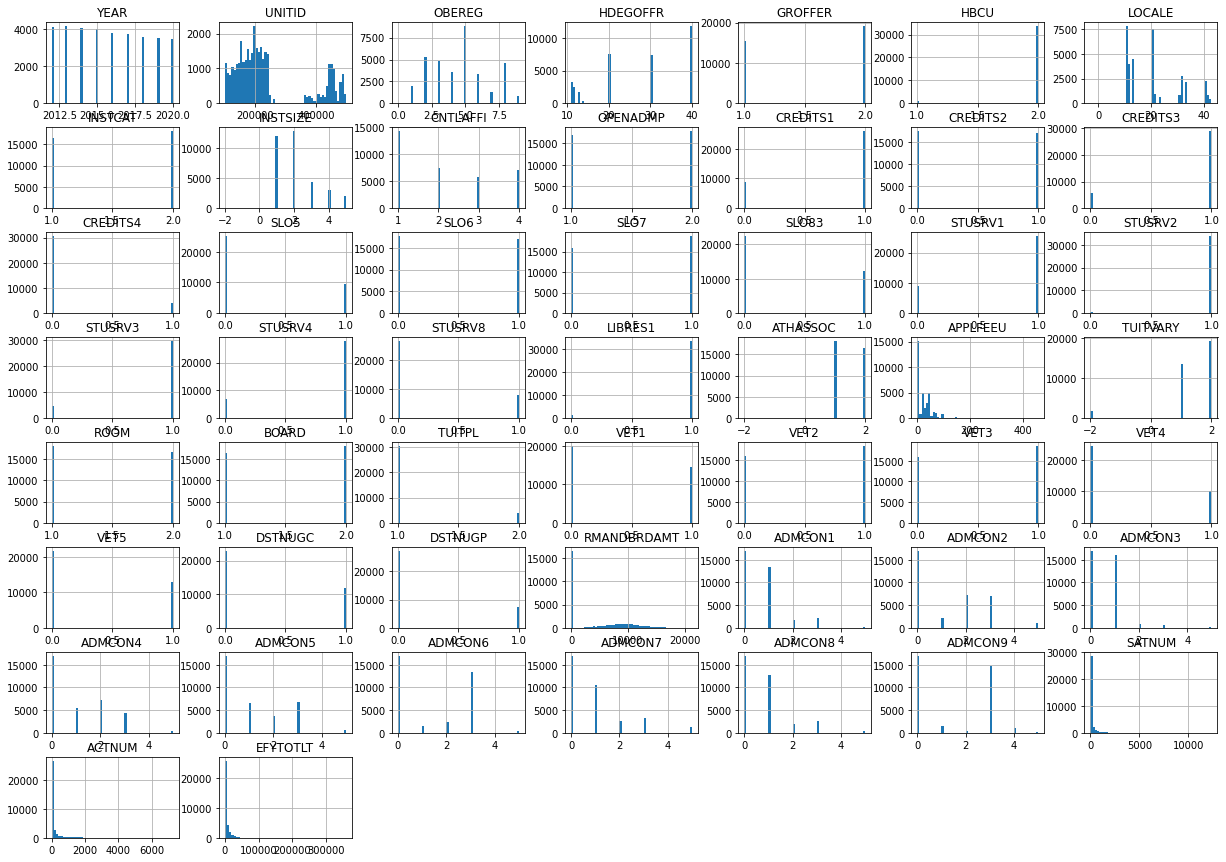

In [12]:
df.hist(bins=55, figsize=(21,15))
plt.show()

In [13]:
df['TUITVARY'].value_counts()

 2    19302
 1    13452
-2     1805
Name: TUITVARY, dtype: int64

### Looking at the histograms I realize that one of the variables still needs to be corrected as it contains a "Not Applicable" code: TUITVARY

### We are going to assign  a "NO" to the institutions for which TUITVARY is not applicable since these are institutions that are operating and mainly appear to be college level. 

### Some are  mixed undergraduate and Graduate level institutions but a minority (only 3) 

In [14]:
colc=['TUITVARY']

for i in colc:
  df[i] = df[i].astype(str)
  df[i] = df[i].map(lambda x: re.sub(r'-2', '2', x))
  df[i] = df[i].astype(int)

In [15]:
df['INSTSIZE'].value_counts()

# INSTSIZE	1	Under 1,000
# INSTSIZE	2	1,000 - 4,999
# INSTSIZE	3	5,000 - 9,999
# INSTSIZE	4	10,000 - 19,999
# INSTSIZE	5	20,000 and above
# INSTSIZE	-1	Not reported
# INSTSIZE	-2	Not applicable

 2    12903
 1    12151
 3     4404
 4     3077
 5     2008
-1       13
-2        3
Name: INSTSIZE, dtype: int64

In [16]:
# Slice OUt  -2 and -1 

In [17]:
df=df.loc[lambda df:((df['INSTSIZE']!=-2)&(df['INSTSIZE']!=-1)),:]

In [18]:
df[['OBEREG']].value_counts()

OBEREG
5         8805
2         5272
3         4846
8         4634
4         3533
6         3351
1         1998
7         1276
9          788
0           40
dtype: int64

### Removing CODE 9 = Outlying areas AS FM GU MH MP PR PW VI - (Not in the Continental USA) and CODE = 0 Service Schools 

In [19]:
df=df.loc[lambda df:((df['OBEREG']!=0)&(df['OBEREG']!=9)),:]

In [20]:
# df.columns

In [21]:
df[['ATHASSOC']].value_counts()

ATHASSOC
 1          17893
 2          15820
-2              2
dtype: int64

In [22]:
df=df.loc[lambda df:((df['ATHASSOC']!=-2)),:]

In [23]:
# df[['ADMCON1']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required

# # ADMCON1 Secondary school GPA


In [24]:
# df[['ADMCON2']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required

# # ADMCON2 Secondary school rank

In [25]:
# df[['ADMCON3']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required

# # ADMCON3 Secondary school record (ALL Schools look at HS Records)

In [26]:
# df[['ADMCON4']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required


# # ADMCON4 Completion of college-preparatory program

In [27]:
# df[['ADMCON5']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required

# # ADMCON5 Recommendations

In [28]:
# df[['ADMCON6']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required


# # ADMCON6 Formal demonstration of competencies

In [29]:
df[['ADMCON7']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required


# # ADMCON7 Admission test scores

ADMCON7
0          16525
1          10451
3           3037
2           2481
5           1208
4             11
dtype: int64

In [30]:
# df[['ADMCON8']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required


# # ADMCON8 TOEFL (Test of English as a Foreign Language

In [31]:
# df[['ADMCON9']].value_counts()
# # 0 Not Applicable
# # 1 Required
# # 2 Recommended
# # 3 Neither required nor recommended
# # 4 Do not know
# # 5 Considered but not required


# # ADMCON9 Other Test (Wonderlic, WISC-III, etc.)

# Let us recap the variables selected and their codes:

## 'EFYTOTLT' = Our target variable is total enrollment 

## 'YEAR' = Our data refers to the years between 2012 and 2020

## 'UNITID' = ID code for each Heigher Education Institution

## 'STABBR' = State Abbreviation 

## 'INSTNM' = Institution's name

## 'OBEREG'= Code indicating the Bureau of Economic Analysis Regions the US is divided into (MD is in region 2) 
### 0 - US Service schools (REMOVED from DF)
### 1 - New England CT ME MA NH RI VT
### 2 - Mid East DE DC MD NJ NY PA
### 3 - Great Lakes IL IN MI OH WI
### 4 - Plains IA KS MN MO NE ND SD
### 5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV
### 6 - Southwest AZ NM OK TX
### 7 - Rocky Mountains CO ID MT UT WY
### 8 - Far West AK CA HI NV OR WA
### 9 - Outlying areas AS FM GU MH MP PR PW VI  - (Not in the Continental USA) (REMOVED from DF)  

## 'HDEGOFFR'= Code indicating the level of Degree offered by the Academic-Oriented HEI
### 11	Doctor's degree - research/scholarship and professional practice
### 12	Doctor's degree - research/scholarship
### 13	Doctor's degree -  professional practice
### 14	Doctor's degree - other
### 20	Master's degree
### 30	Bachelor's degree
### 40	Associate's degree


## 'GROFFER' = Code indicating whether the HEI offers Graduate Level degrees
### 1	Graduate degree or certificate offering
### 2	No graduate offering

## 'HBCU' = Code indicating whether the HEI is an Historical Black College or University 
### 1 - Yes
### 2 - No 

## 'LOCALE' = Code indicating the territorial location of the HEI
### 11	City: Large
### 12	City: Midsize
### 13	City: Small
### 21	Suburb: Large
### 22	Suburb: Midsize
### 23	Suburb: Small
### 31	Town: Fringe
### 32	Town: Distant
### 33	Town: Remote
### 41	Rural: Fringe
### 42	Rural: Distant
### 43	Rural: Remote
### -3	{Not available}

## 'INSTCAT' = Code indicating the type of institution
### 1 - indicates institutions offering undergraduate programs
### 2 - indicates institutions offering both graduate and undergraduate programs

## 'INSTSIZE'= Code indicating the range of students enrollable by year
### 1	Under 1,000
### 2	1,000 - 4,999
### 3	5,000 - 9,999
### 4	10,000 - 19,999
### 5	20,000 and above

## 'CNTLAFFI'= Code indicating the type of control the HEI is subject to 
###	1	Public
###	2	Private for-profit
###	3	Private not-for-profit (no religious affiliation)
###	4	Private not-for-profit (religious affiliation)

## 'OPENADMP' = Code indicating whether the HEI adopts an Open Enrollment Policy or not
### 1 = Yes
### 2 = No

## 'CREDITS1'= Dual enrollment
## 'CREDITS2'= Credit for life experiences
## 'CREDITS3'= Advanced placement (AP) credits
## 'CREDITS4'= Institution does not accept dual, credit for life, or AP credits
### Code  0 = No 
### Code 1 = Yes 

## 'SLO5' = ROTC
## 'SLO6' = Study abroad
## 'SLO7' = Weekend/evening  college
## 'SLO83' = Teacher certification: Approved by the state for initial certifcation or licensure of teachers
### Code  0 = No 
### Code 1 = Yes 

## 'STUSRV1	Remedial services
## STUSRV2	Academic/career counseling service
## STUSRV3	Employment services for students
## STUSRV4	Placement services for completers
## STUSRV8	On-campus day care for students' children
### Code  0 = No 
### Code 1 = Yes 


## 'LIBRES1' = Variable indicating whether the HEI has a library 
### Code  0 = No 
### Code 1 = Yes

## 'ATHASSOC' = Member of National Athletic Association
### 1 - Yes
### 2 - No 

## 'APPLFEEU' = Application Fee

## 'TUITVARY' = Tuition charge varies for in-district, in-state, out-of-state students
### 1 - Yes
### 2 - No 


## 'ROOM' = HEI provides housing
### 1 - Yes
### 2 - No 

## 'BOARD', = HEI provides meal plan 
### 1 - Yes
### 2 - No 

## 'TUITPL' = Any alternative tuition plans offered by institution
### 1 - Yes
### 2 - No 

## VET1	Yellow Ribbon Program (officially known as Post-9/11 GI Bill, Yellow Ribbon Program)
## VET2	Credit for military training
## VET3	Dedicated point of contact for support services for veterans, military servicemembers, and their families
## VET4	Recognized student veteran organization
## VET5	Member of Servicemembers Opportunity Colleges
### Code  0 = No 
### Code 1 = Yes
NOTE: Data for these variables are missing for years 2012 and 2013 

## 'DSTNUGC' = Undergraduate Level distance Education Courses Offered
## DSTNUGP	Undergraduate level distance education programs offered
### Code  0 = No 
### Code 1 = Yes

## 'RMANDBRDAMT' = Room and Board costs

## ADMCON1	Secondary school GPA
## ADMCON2	Secondary school rank
## ADMCON3	Secondary school record
## ADMCON4	Completion of college-preparatory program
## ADMCON5	Recommendations
## ADMCON6	Formal demonstration of competencies
## ADMCON7	Admission test scores
## ADMCON8	TOEFL (Test of English as a Foreign Language
## ADMCON9	Other Test (Wonderlic, WISC-III, etc.)
### 0 Not Applicable
### 1	Required
###	2	Recommended
###	3	Neither required nor recommended
###	4	Do not know
###	5	Considered but not required

## SATNUM	Number of first-time degree/certificate-seeking students submitting SAT scores
## ACTNUM	Number of first-time degree/certificate-seeking students submitting ACT scores


### Taking a look at the Mean and Standard Deviation of our numerical variables we see that the variables are not normally distributed. The data is affected by outliers 

In [32]:
### Mean and standard deviation across the numerical data indicates clearly (if there were any doubts) that 
### there are outliers in our Target variable as well as the other but below we have the box plot by year to check out 


cols = ['APPLFEEU', 'RMANDBRDAMT', 'SATNUM', 'ACTNUM','EFYTOTLT']

def get_stats(df):
  for i in cols:
    mean_i=round(df[i].mean(),2 )
    stdr_i =round(df[i].std(), 2)  
    print(i, 'mean: ', mean_i)
    print(i, 'standard dev: ', stdr_i)

get_stats(df)   



APPLFEEU mean:  24.57
APPLFEEU standard dev:  28.27
RMANDBRDAMT mean:  4943.19
RMANDBRDAMT standard dev:  5219.85
SATNUM mean:  204.0
SATNUM standard dev:  641.01
ACTNUM mean:  199.46
ACTNUM standard dev:  601.56
EFYTOTLT mean:  5983.5
EFYTOTLT standard dev:  10430.84


In [33]:
df[['APPLFEEU','RMANDBRDAMT','SATNUM', 'ACTNUM','EFYTOTLT']].describe().round(decimals=2)

,APPLFEEU,RMANDBRDAMT,SATNUM,ACTNUM,EFYTOTLT
count,33713.00,33713.00,33713.00,33713.00,33713.00
mean,24.57,4943.19,204.00,199.46,5983.50
std,28.27,5219.85,641.01,601.56,10430.84
min,0.00,0.00,0.00,0.00,2.00
25%,0.00,0.00,0.00,0.00,758.00
50%,20.00,4000.00,0.00,0.00,2193.00
75%,45.00,9490.00,65.00,109.00,6809.00
max,460.00,21330.00,12350.00,7265.00,359464.00


### Looking at the minimum number of enrolled students boxplot and stats data we immediately see that there is probably an error in data recording since the minimum number of students  is equal to 2 

### Let us take a closer look 

In [34]:
df.loc[lambda df:((df['EFYTOTLT']==6)),:]

,YEAR,UNITID,STABBR,INSTNM,OBEREG,HDEGOFFR,GROFFER,HBCU,LOCALE,INSTCAT,...,ADMCON3,ADMCON4,ADMCON5,ADMCON6,ADMCON7,ADMCON8,ADMCON9,SATNUM,ACTNUM,EFYTOTLT
8063,2012,461485,NC,Shepherds Theological Seminary,5,20,1,2,21,2,...,0,0,0,0,0,0,0,0,0,6
8173,2012,480499,IA,Shiloh University,4,20,1,2,42,2,...,2,3,1,3,3,1,3,0,0,6
31353,2020,120838,CA,Pacific States University,8,20,1,2,11,2,...,0,0,0,0,0,0,0,0,0,6
31691,2020,142957,IL,American Islamic College,3,20,1,2,11,2,...,3,3,1,3,3,2,3,0,0,6


### Taking a closer look we see that these are probably Doctorate level students 
### Before proceeding let us substitute CODE 11, 12, 13, and 14 with CODE 10 for the 'HDEGOFFR'= Code indicating the highest level of Degree offered by the Academic-Oriented HEI, since all of these codes as indicated above represent a doctorate level degree 


In [35]:
colc=['HDEGOFFR']

for i in colc:
  df[i] = df[i].astype(str)
  df[i] = df[i].map(lambda x: re.sub(r'11', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'12', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'13', '10', x))
  df[i] = df[i].map(lambda x: re.sub(r'14', '10', x))
  df[i] = df[i].astype(int)

<!-- ### Similarly, before proceeding let us address the LOCALE codes and aggregate codes indicating City (Large, Midsize, and Small), Sub-Urban (Large, Midsize, and Small), Rural (Fringe, Distant, Remote), and Town (Fringe, Distant, Remote) areas 
11 City: Large
12 City: Midsize
13 City: Small
21 Suburb: Large
22 Suburb: Midsize
23 Suburb: Small
31 Town: Fringe
32 Town: Distant
33 Town: Remote
41 Rural: Fringe
42 Rural: Distant
43 Rural: Remote -->

### We could do the same with LOCALE but the data, even if aggregated, would remain unbalanced. Let su leave it for now

In [36]:
df['LOCALE'].value_counts()

11    7674
21    7238
13    4321
12    3847
32    2734
41    2257
33    2125
22     924
42     806
31     782
23     579
43     426
Name: LOCALE, dtype: int64

In [37]:
# #df['math score'].mask(df['math score'] >=60 ,'good', inplace=True)
# df['LOCALE'].mask((df['LOCALE']<20, 10)&((df['LOCALE']>20)&
#                                          (df['LOCALE']<30), 20)&((df['LOCALE']>30)&
#                                                                  (df['LOCALE']<40), 30)&((df['LOCALE']>40)&(df['LOCALE']<50), 40), inplace=True)

# # gm.loc[(gm['employrate'] <55) & (gm['employrate'] > 50),'employrate']=11

# # df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],['1st new value','2nd new value',...])

### Taking a look at the numerical variables, it is clear that the data needs to be rescaled and that it also presents outliers 

Text(0.5, 1.0, '\nBox-Plots of the Application Fees by Year\n')

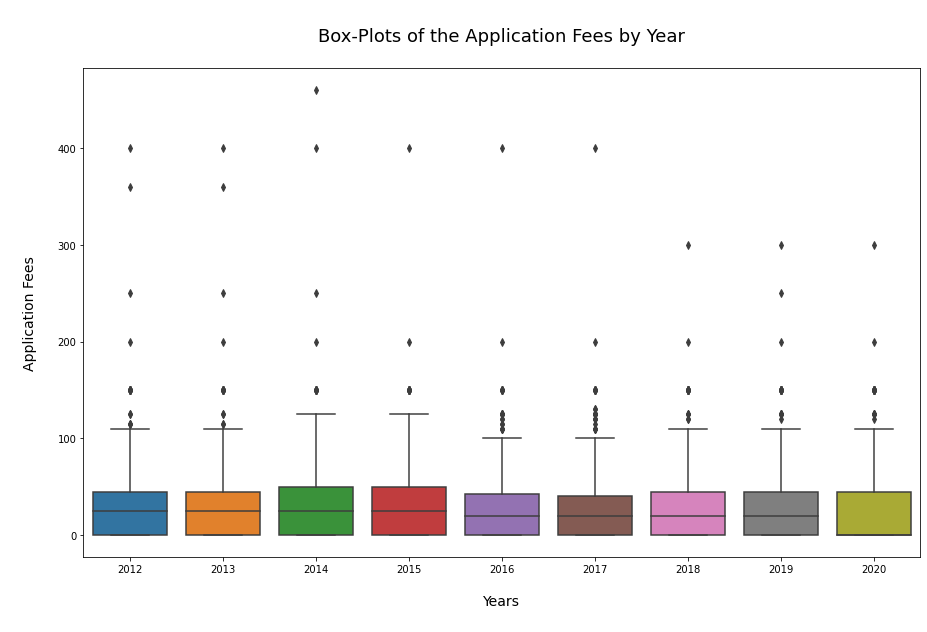

In [38]:
# sns.set(rc = {'figure.figsize':(15,9)})
# boxplot = df.boxplot(column=['APPLFEEU'], by='YEAR') 

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='YEAR', y='APPLFEEU', data=df)
ax.set_xlabel('\nYears\n',fontsize=14)
ax.set_ylabel('\nApplication Fees\n',fontsize=14)
plt.title('\nBox-Plots of the Application Fees by Year\n',fontsize=18)



### There has been a gradual increase in the cost of the median Room & Board as the boxplots below show and confirm what we already saw in our graphs 

Text(0.5, 1.0, '\nBox-Plots of the Room & Board Aggregated Fees by Year\n')

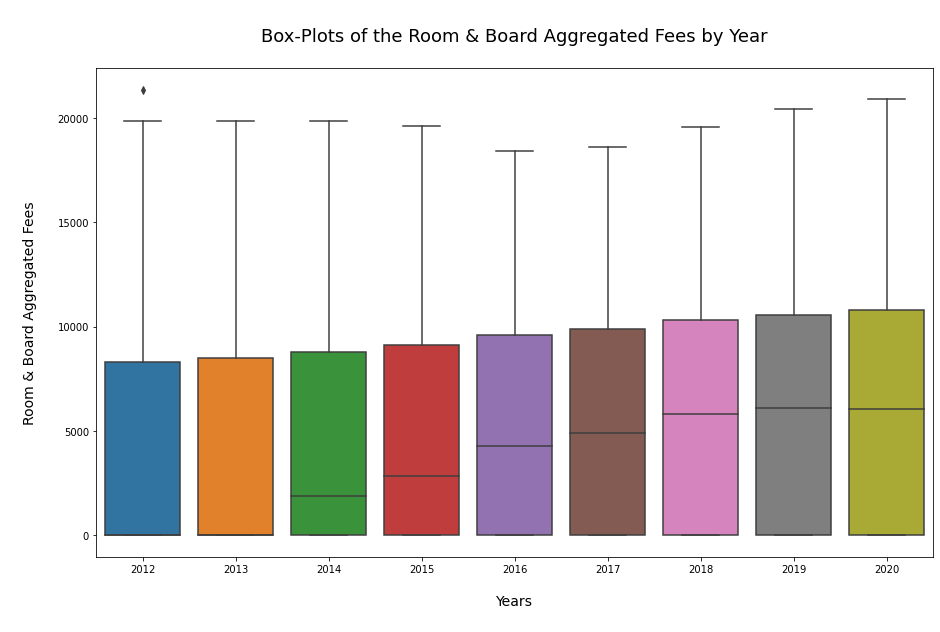

In [39]:
# sns.set(rc = {'figure.figsize':(15,9)})
# boxplot = df.boxplot(column=['RMANDBRDAMT'], by='YEAR') 


fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='YEAR', y='RMANDBRDAMT', data=df)
ax.set_xlabel('\nYears\n',fontsize=14)
ax.set_ylabel('\nRoom & Board Aggregated Fees\n',fontsize=14)
plt.title('\nBox-Plots of the Room & Board Aggregated Fees by Year\n',fontsize=18)



### The number of SAT and ACT tests submitted are extremely skewed left, it would be preferable to view the boxplots eliminating null values from the sample

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


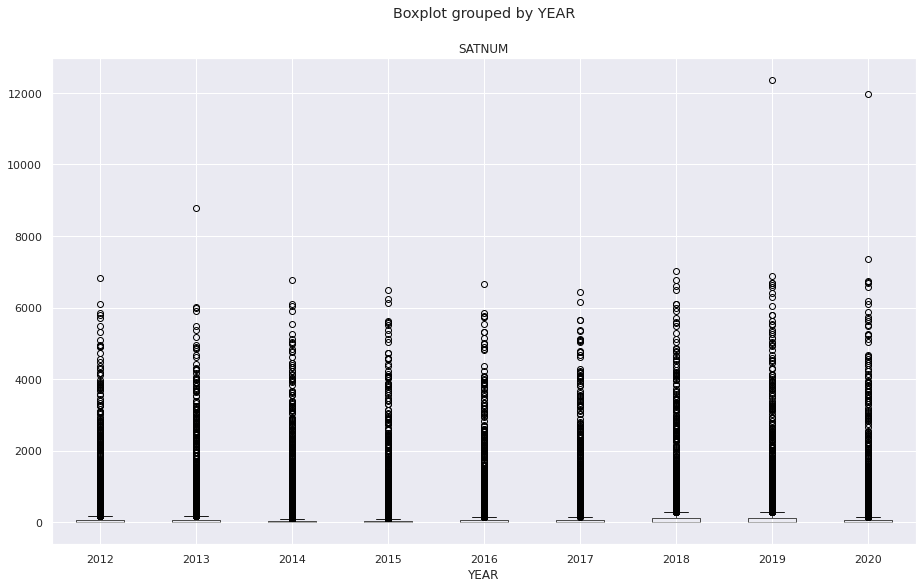

In [40]:
sns.set(rc = {'figure.figsize':(15,9)})
boxplot = df.boxplot(column=['SATNUM'], by='YEAR') 


# fig, ax = plt.subplots(figsize=(15,9))
# ax = sns.boxplot(x='YEAR', y='SATNUM', data=df)
# ax.set_xlabel('\nYears\n',fontsize=14)
# ax.set_ylabel('\nNumber of SAT Scores Submitted\n',fontsize=14)
# plt.title('\nBox-Plots of the Number of SAT Scores Submitted by Year\n',fontsize=18)



# # fig, ax = plt.subplots(figsize=(15,9))
# # ax = sns.boxplot(x='Metric', y='Length', data=samples, order=["B2A1", "B2A10"])
# # ax = sns.swarmplot(x="Metric", y="Length", data=samples, color=".25", order=["B2A1", "B2A10"])
# # ax.set_xlabel('Label X-Axis')
# # ax.set_ylabel('Label Y-Axis')
# # plt.title('Title',fontsize=16)
# # labels = [item.get_text() for item in ax.get_xticklabels()]
# # labels[0] = 'Sample 1'
# # labels[1] = 'Sample 2'
# # ax.set_xticklabels(labels)
# # plt.savefig('test.png', dpi=300, bbox_inches='tight')

In [41]:
# df.columns

In [42]:
df[['YEAR', 'STABBR','OPENADMP','ADMCON7','SATNUM']].tail()

,YEAR,STABBR,OPENADMP,ADMCON7,SATNUM
34554,2020,CA,1,0,0
34555,2020,CA,1,0,0
34556,2020,CA,1,0,0
34557,2020,CA,1,0,0
34558,2020,CA,1,0,0


In [43]:
df['ADMCON7'].value_counts()

0    16525
1    10451
3     3037
2     2481
5     1208
4       11
Name: ADMCON7, dtype: int64

In [44]:
df['INSTSIZE'].value_counts()

2    12512
1    11805
3     4364
4     3025
5     2007
Name: INSTSIZE, dtype: int64

In [45]:
df['SATNUM'].max()

12350

In [46]:
df['SATNUM'].describe()

count    33713.00000
mean       203.99561
std        641.00972
min          0.00000
25%          0.00000
50%          0.00000
75%         65.00000
max      12350.00000
Name: SATNUM, dtype: float64

In [47]:
# df_test['SATNUM'].describe()

In [48]:
# df.info()

In [49]:
df['SATNUM'].head()

0    136
1    106
2      0
3    183
4    212
Name: SATNUM, dtype: int64

In [50]:
# df_tests=df.loc[lambda df:((df['ADMCON7']!=0)|(df['ADMCON7']!=4)),:]
df_tests=df.loc[lambda df:((df['ADMCON7']!=0)),:]
df_test=df_tests.loc[lambda df_tests:((df_tests['ADMCON7']!=4)),:]

In [51]:
df_test['ADMCON7'].value_counts()

1    10451
3     3037
2     2481
5     1208
Name: ADMCON7, dtype: int64

In [52]:
df_test['SATNUM'].value_counts()

0        6032
23         67
8          66
19         65
5          65
         ... 
3045        1
4338        1
628         1
921         1
11957       1
Name: SATNUM, Length: 2321, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0.5, 72, '1 Required \n2 Recommended \n3 Neither required nor recommended \n5 Considered but not required')

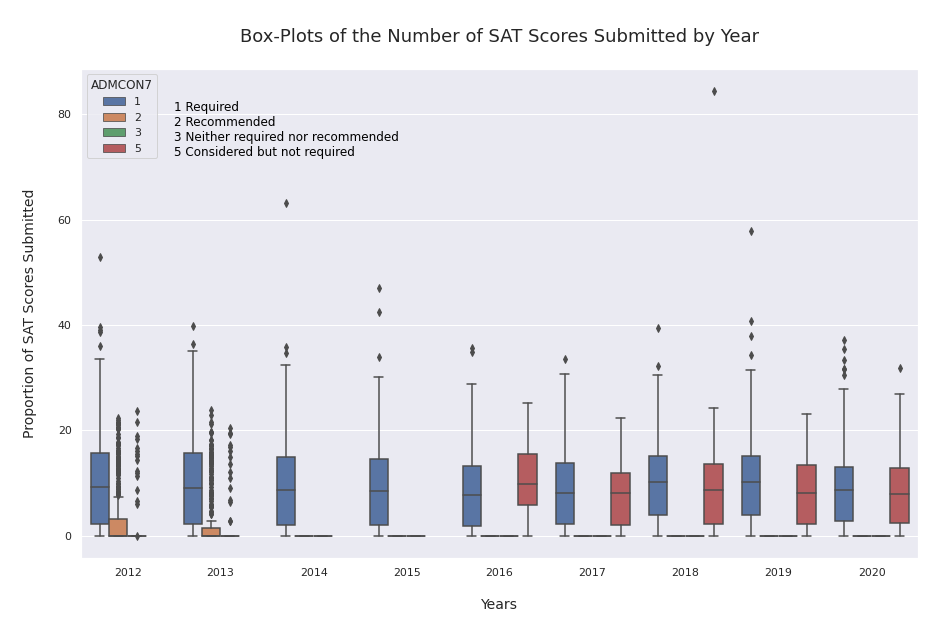

In [53]:

# https://stackoverflow.com/questions/62025957/filter-data-and-modifying-labels-in-seaborn-boxplot-graphs
# https://www.codegrepper.com/code-examples/python/frameworks/file-path-in-python/To+remove+outliers+in+data

### Let us filter the SAT Scores so that we do not account for non-reported scores due to the Institutions' Policy 
### Variable 'ADMCON7' indicates whether the institution asks students to report Admission Test scores - 
### filtering out the institutions who do not require them, we can have a better representation of the data

### The result is better but let us also rescale the data based on Number of Enrolled Students per year 

df_test['PROP_SATNUM']=round(((df_test['SATNUM']/df_test['EFYTOTLT'])*100), 2)
df_test['PROP_ACTNUM']=round(((df_test['ACTNUM']/df_test['EFYTOTLT'])*100), 2)
  

def remove_outlier(df_test, col_name):
    q1 = df_test[col_name].quantile(0.25)
    q3 = df_test[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_test = df_test.loc[(df_test[col_name] > fence_low) & (df_test[col_name] < fence_high)]
    return df_test


remove_outlier(df_test, 'PROP_SATNUM')


# df_test.shape

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='YEAR', y='PROP_SATNUM', hue ='ADMCON7', data=df_test)
ax.set_xlabel('\nYears\n',fontsize=14)
ax.set_ylabel('\nProportion of SAT Scores Submitted\n',fontsize=14)
plt.title('\nBox-Plots of the Number of SAT Scores Submitted by Year\n',fontsize=18)
sns.move_legend(ax, "upper left")
# new_labels=['1 Required', '2 Recommended','3 Neither required nor recommended','5 Considered but not required']

plt.text(0+0.5, 72, "1 Required \n2 Recommended \n3 Neither required nor recommended \n5 Considered but not required", horizontalalignment='left', 
         size='medium', color='black')


Text(0.5, 48, '1 Required \n2 Recommended \n3 Neither required nor recommended \n5 Considered but not required')

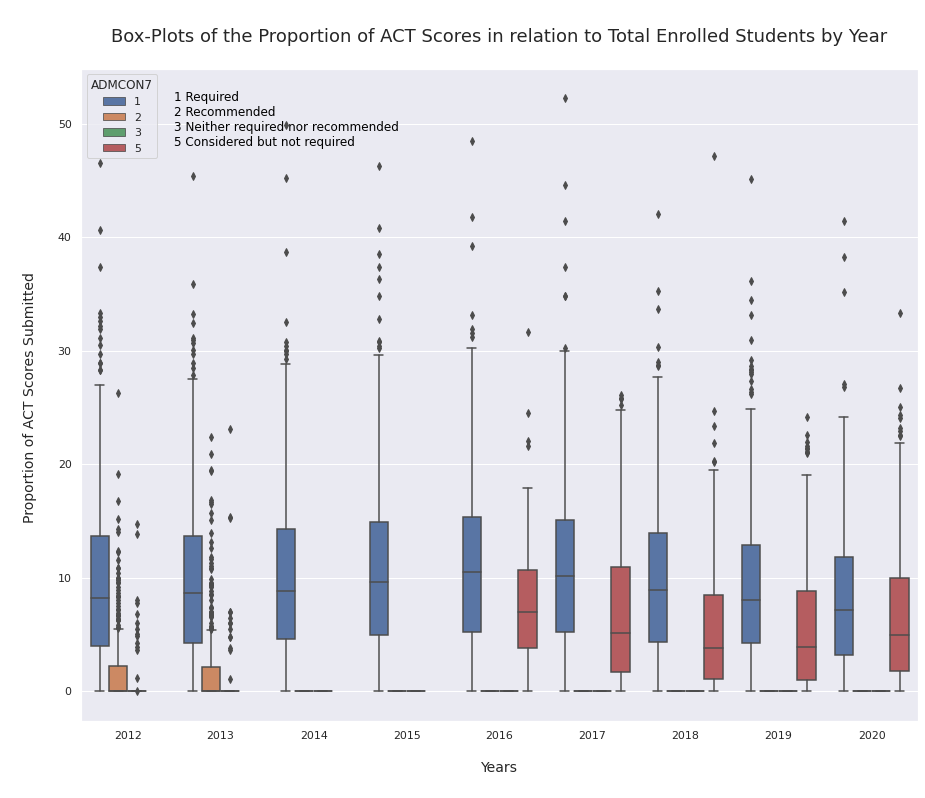

In [54]:
remove_outlier(df_test, 'PROP_ACTNUM')

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.boxplot(x='YEAR', y='PROP_ACTNUM', hue ='ADMCON7', data=df_test)
ax.set_xlabel('\nYears\n',fontsize=14)
ax.set_ylabel('\nProportion of ACT Scores Submitted \n',fontsize=14)
plt.title('\nBox-Plots of the Proportion of ACT Scores in relation to Total Enrolled Students by Year\n',fontsize=18)
sns.move_legend(ax, "upper left")
plt.text(0+0.5, 48, "1 Required \n2 Recommended \n3 Neither required nor recommended \n5 Considered but not required", horizontalalignment='left', 
         size='medium', color='black')

Text(0.5, 1.0, '\nBox-Plots of the Number of ACT Scores Submitted by Year\n')

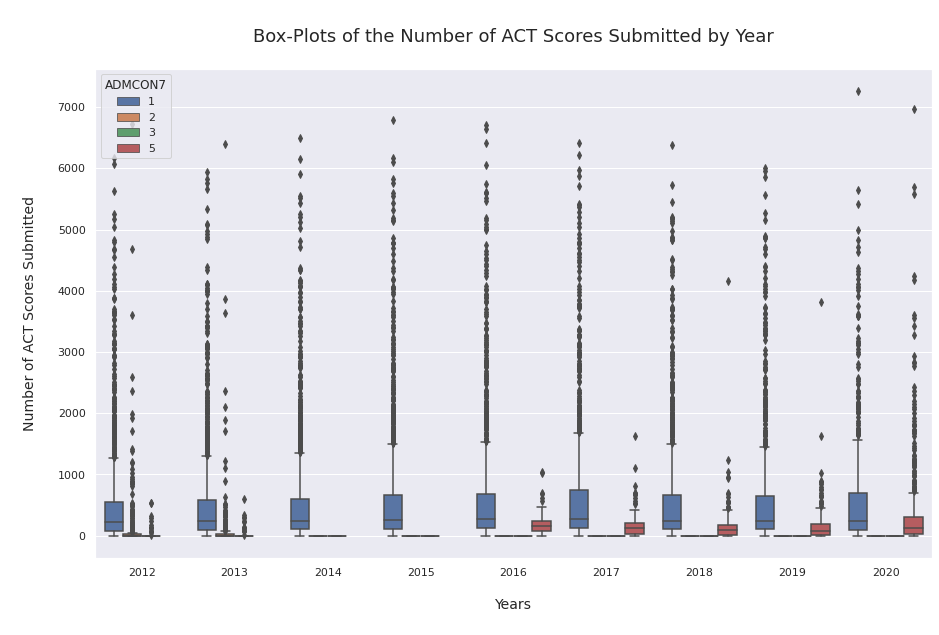

In [55]:
# sns.set(rc = {'figure.figsize':(15,9)})
# boxplot = df.boxplot(column=['ACTNUM'], by='YEAR') 

# sns.set(rc = {'figure.figsize':(15,9)})
# boxplot = df_test.boxplot(column=['ACTNUM'], by='YEAR') 

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='YEAR', y='ACTNUM', hue ='ADMCON7', data=df_test)
ax.set_xlabel('\nYears\n',fontsize=14)
ax.set_ylabel('\nNumber of ACT Scores Submitted\n',fontsize=14)
plt.title('\nBox-Plots of the Number of ACT Scores Submitted by Year\n',fontsize=18)

Text(0.5, 1.0, '\nBox-Plots of Total Enrolled Students by Year\n')

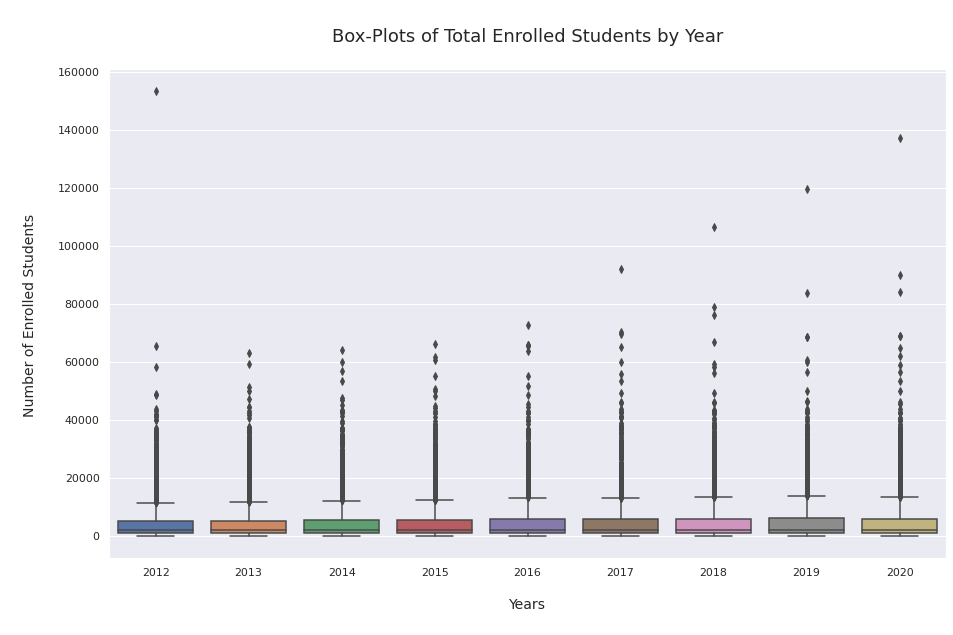

In [56]:
# sns.set(rc = {'figure.figsize':(15,9)})
# boxplot = df.boxplot(column=['EFYTOTLT'], by='YEAR') 

remove_outlier(df_test, 'EFYTOTLT')

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='YEAR', y='EFYTOTLT', data=df_test)
ax.set_xlabel('\nYears\n',fontsize=14)
ax.set_ylabel('\nNumber of Enrolled Students \n',fontsize=14)
plt.title('\nBox-Plots of Total Enrolled Students by Year\n',fontsize=18)
# sns.move_legend(ax, "upper left")
# plt.text(0+0.5, 48, "1 Required \n2 Recommended \n3 Neither required nor recommended \n5 Considered but not required", horizontalalignment='left', 
#          size='medium', color='black')

Text(0.5, 127000, '1 Under 1,000 \n2 1,000 - 4,999 \n3 5,000 - 9,999 \n4 10,000 - 19,999 \n5 20,000 and above')

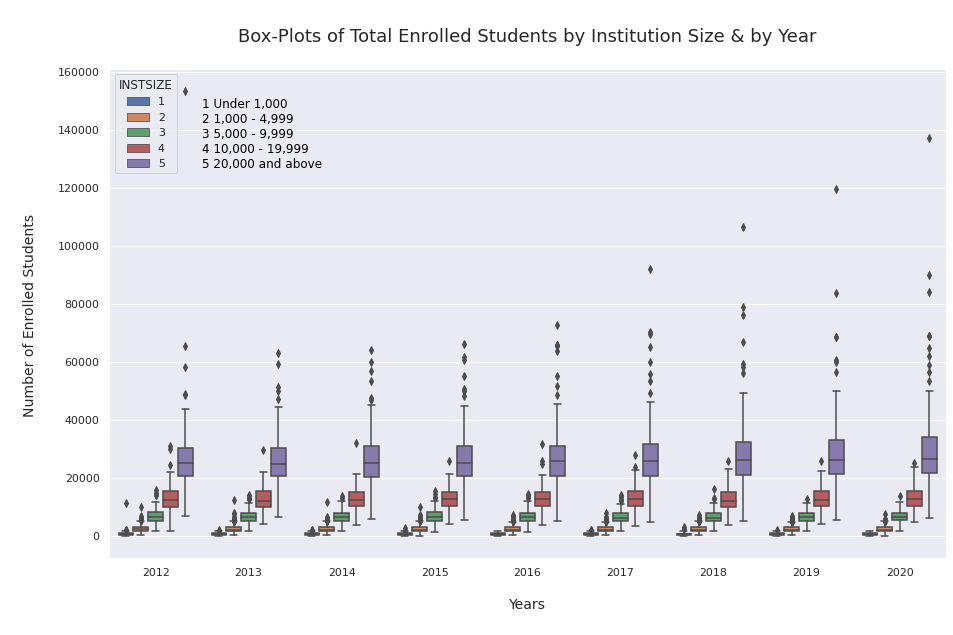

In [57]:
# sns.set(rc = {'figure.figsize':(15,9)})
# boxplot = df.boxplot(column=['EFYTOTLT'], by='YEAR') 

remove_outlier(df_test, 'EFYTOTLT')

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='YEAR', y='EFYTOTLT', hue='INSTSIZE', data=df_test)
ax.set_xlabel('\nYears\n',fontsize=14)
ax.set_ylabel('\nNumber of Enrolled Students \n',fontsize=14)
plt.title('\nBox-Plots of Total Enrolled Students by Institution Size & by Year\n',fontsize=18)
# sns.move_legend(ax, "upper left")
plt.text(0+0.5, 127000, "1 Under 1,000 \n2 1,000 - 4,999 \n3 5,000 - 9,999 \n4 10,000 - 19,999 \n5 20,000 and above", horizontalalignment='left', 
         size='medium', color='black')

In [58]:
df.columns

Index(['YEAR', 'UNITID', 'STABBR', 'INSTNM', 'OBEREG', 'HDEGOFFR', 'GROFFER',
       'HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
       'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
       'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8',
       'LIBRES1', 'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD',
       'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP',
       'RMANDBRDAMT', 'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
       'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM',
       'EFYTOTLT'],
      dtype='object')

<!-- ### Let us look at the enrollment numbers in relation to the Institutional Size 

### Let us use the midpoint value of the  -->

In [59]:
# df['INSTSIZE'].value_counts()

# # INSTSIZE	1	Under 1,000
# # INSTSIZE	2	1,000 - 4,999
# # INSTSIZE	3	5,000 - 9,999
# # INSTSIZE	4	10,000 - 19,999
# # INSTSIZE	5	20,000 and above

In [60]:
# df.groupby(['INSTSIZE'], as_index=False)['EFYTOTLT'].describe()

In [61]:
# grouped = df.groupby(['INSTSIZE'], as_index=False)['EFYTOTLT']
# df_grouped = grouped.describe().to_frame().reset_index()
# df_grouped
# # # resample per quarter, (grouping by) for each weekday
# # grouper = d.groupby([pd.Grouper(freq='1Q'), 'weekday'])
# # # create a new data frame with for each Quarter the average daily death index for each day of the week (again, between 0.9 and 1.1) 
# # d2 = grouper['relative30DayCount'].mean().to_frame(name = 'mean').reset_index()

### Furthermore, many of the variables are discreet and categorical in nature really. 

### This requires us to make sure that our algorithm interprets the data correctly as categorical in nature, and not numeric

### In order to fix this problem we will preprocess the data

### However, before preprocessing the data, we will split our df in training and testing datasets. This is done at this stage in order not to influence the training dataset with information from our Testing dataset, therefore allowing us to build a more valuable model for prediction purposes

https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b



### Because many of the variables in our DF are categorical in nature we will convert these back into object types in order to have our df set up for one hot encoding. 

In [62]:
df.shape

(33713, 53)

In [63]:
# df.columns

In [64]:
# df.info()

In [65]:
pip install bokeh

In [66]:
# # sns.set(rc = {'figure.figsize':(30,16)})
# # mask = np.triu(np.ones_like(df.corr(), dtype=bool))
# # # sns.palplot(sns.diverging_palette(200, 100, n=11))
# # sns.heatmap(df.corr(), mask =mask, annot=True, fmt=".2f",cmap="PiYG")

# # plt.title("Heat Map \n Variables' Correlations", fontsize=20)
# # plt.tick_params(axis='both', which='major', labelsize=14)

# # plt.show()

In [67]:
# df.columns

In [68]:
df['UNITID'] = df['UNITID'].astype(str)
df['OBEREG'] = df['OBEREG'].astype(str)
df['HDEGOFFR'] = df['HDEGOFFR'].astype(str)
df['GROFFER'] = df['GROFFER'].astype(str)
df['HBCU'] = df['HBCU'].astype(str)
df['LOCALE'] = df['LOCALE'].astype(str)
df['INSTCAT'] = df['INSTCAT'].astype(str)
df['INSTSIZE'] = df['INSTSIZE'].astype(str)
df['CNTLAFFI'] = df['CNTLAFFI'].astype(str)
df['OPENADMP'] = df['OPENADMP'].astype(str)
df['CREDITS1'] = df['CREDITS1'].astype(str)
df['CREDITS2'] = df['CREDITS2'].astype(str)
df['CREDITS3'] = df['CREDITS3'].astype(str)
df['CREDITS4'] = df['CREDITS4'].astype(str)
df['SLO5'] = df['SLO5'].astype(str)
df['SLO6'] = df['SLO6'].astype(str)
df['SLO7'] = df['SLO7'].astype(str)
df['SLO83'] = df['SLO83'].astype(str)
df['STUSRV1'] = df['STUSRV1'].astype(str)
df['STUSRV2'] = df['STUSRV2'].astype(str)
df['STUSRV3'] = df['STUSRV3'].astype(str)
df['STUSRV4'] = df['STUSRV4'].astype(str)
df['STUSRV8'] = df['STUSRV8'].astype(str)
df['LIBRES1'] = df['LIBRES1'].astype(str)
df['ATHASSOC'] = df['ATHASSOC'].astype(str)
df['TUITVARY'] = df['TUITVARY'].astype(str)
df['ROOM'] = df['ROOM'].astype(str)
df['BOARD'] = df['BOARD'].astype(str)
df['TUITPL'] = df['TUITPL'].astype(str)
df['VET1'] = df['VET1'].astype(str)
df['VET2'] = df['VET2'].astype(str)
df['VET3'] = df['VET3'].astype(str)
df['VET4'] = df['VET4'].astype(str)
df['VET5'] = df['VET5'].astype(str)
df['DSTNUGC'] = df['DSTNUGC'].astype(str)
df['DSTNUGP'] = df['DSTNUGP'].astype(str)
df['ADMCON1'] = df['ADMCON1'].astype(str)
df['ADMCON2'] = df['ADMCON2'].astype(str)
df['ADMCON3'] = df['ADMCON3'].astype(str)
df['ADMCON4'] = df['ADMCON4'].astype(str)
df['ADMCON5'] = df['ADMCON5'].astype(str)
df['ADMCON6'] = df['ADMCON6'].astype(str)
df['ADMCON7'] = df['ADMCON7'].astype(str)
df['ADMCON8'] = df['ADMCON8'].astype(str)
df['ADMCON9'] = df['ADMCON9'].astype(str)




In [69]:
#### REVIEW HOW TO CREATE HEAT MAP FOR CATEGORICAL VARIABLES 

# # sns.set(rc = {'figure.figsize':(30,16)})
# # mask = np.triu(np.ones_like(df.corr(), dtype=bool))
# # # sns.palplot(sns.diverging_palette(200, 100, n=11))
# # sns.heatmap(df.corr(), mask =mask, annot=True, fmt=".2f",cmap="PiYG")

# # plt.title("Heat Map \n Variables' Correlations", fontsize=20)
# # plt.tick_params(axis='both', which='major', labelsize=14)

# # plt.show()

# # https://docs.bokeh.org/en/latest/docs/gallery/categorical_heatmap.html CHECK THIS OUT 


# from bokeh.plotting import figure, show

# factors = ['STABBR', 'OBEREG', 'HDEGOFFR', 'GROFFER','HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
#            'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
#            'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8','LIBRES1', 'ATHASSOC', 'TUITVARY', 'ROOM', 'BOARD',
#            'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP','ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
#            'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9']
# x = ['STABBR', 'OBEREG', 'HDEGOFFR', 'GROFFER','HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
#      'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
#      'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8','LIBRES1', 'ATHASSOC', 'TUITVARY', 'ROOM', 'BOARD',
#      'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP','ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
#      'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9']
# y = ['STABBR', 'OBEREG', 'HDEGOFFR', 'GROFFER','HBCU', 'LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP',
#      'CREDITS1', 'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7',
#      'SLO83', 'STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8','LIBRES1', 'ATHASSOC', 'TUITVARY', 'ROOM', 'BOARD',
#      'TUITPL', 'VET1', 'VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP','ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5',
#      'ADMCON6', 'ADMCON7', 'ADMCON8', 'ADMCON9']
# # colors = [
# #     "#0B486B", "#79BD9A", "#CFF09E",
# #     "#79BD9A", "#0B486B", "#79BD9A",
# #     "#CFF09E", "#79BD9A", "#0B486B"
# # ]

# p = figure(title="Categorical Heatmap", tools="hover", toolbar_location=None,
#            x_range=factors, y_range=factors)

# p.rect(x, y, color = 'blue', width=0.3, height=0.3)

# show(p)

In [70]:
# df.info()

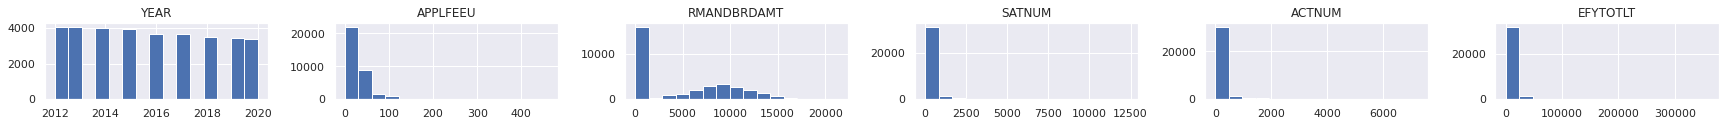

In [71]:
# sns.set(rc = {'figure.figsize':(30,16)})
df.hist(bins=15, figsize=(30, 16), layout=(9, 6));

In [72]:
# df.info()

### We will split our data before pre-processing it as this avoids encountering some issues down the road. There is debate among experts on whether this is the proper approach to hold. 

### Before proceeding we will drop the Institutions' name column from the df and make the year column a date-type column

In [73]:
df.drop(['INSTNM'], axis=1, inplace=True)

### We are dealing with a Time Series of data points here given the fact that the data has been collected every year. This makes our data richer but we also have to keep this element into consideration when applying our ML models. 

### We have to thus start off by chosing how we will best split our data to take into consideration the fact that we have yearly recordings of our features. 

### A simplistic approach would be to just split the data irrespective of the year it was recorded on but this would not allow us to use our data properly or at least fully, especially if we intend to use the data for forecasting purposes

### A different approach would be to use multiple splits of the data between training and testing data sets such that we would train multiple models on training datasets of varying size, while maintaining our testting data set of identical size for comparative purposes 

### A different approach is using a sliding split method known as a Walk Forward Testing Method where the Testing data is always composed of data coming from the dataset one-time-stamp ahead of the data used to train the model

In [74]:
# df.columns

In [75]:
# df.info()

In [76]:
df.drop(['UNITID'], axis=1, inplace=True)

In [77]:
# df_all_data=pd.DataFrame(columns=['File Name', 'File Size', 'Write Time', 'Read Time'])

# def run(filename, rows):
#     global df_all_data
#     data_created = create_data(rows)
#     filehandle = open (filename, 'w', newline = '')
#     loop_time = write_data(filehandle, data_created)
#     filehandle.close()
#     mb_file_size = written_file_size(filename)
#     write_to_df_time = write_to_pandas(filename)
#     df_info_list=[filename, mb_file_size, loop_time, write_to_df_time]
#     print(df_info_list)
    
#     x = pd.Series(df_info_list, index =['File Name', 'File Size', 'Write Time', 'Read Time'], name = 'df_info_series')
#     print('df_info_series')
#     print(x)
#     df_all_data = df_all_data.append(x, ignore_index = True)
#     print(df_all_data)
#     return df_all_data

In [78]:
# df_all_data=pd.DataFrame(columns=['File Name', 'Training Model Accuracy','Testing Model Accuracy',
#                                   'Train MAE', 'Train MSE','Train RMSE', 
#                                   'Test MAE', 'Test MSE','Test RMSE'])

In [79]:
# XGBRFRegressor.get_params(model_xgboost).keys()

In [80]:
# XGBRFRegressor.get_params(model_xgboost)

In [81]:
def feature_importance():
  feat_imp = clf.named_steps['regressor'].feature_importances_
  feature_names=clf.named_steps['preprocessor'].get_feature_names_out(input_features=None)
  feature_names_ = pd.Series(feature_names)
  feature_names_.replace('^num__','',regex=True, inplace = True)
  feature_names_.replace('^cat__','',regex=True, inplace = True)
  feats = pd.DataFrame(feat_imp, columns=['FEAT_IMP'])
  feats = pd.concat([feats, feature_names_], axis=1)
  feats.rename(columns={feats.columns[1]: "FEAT_NAME"}, inplace=True)
  feats.sort_values("FEAT_IMP", ascending = False, inplace=True)
  graph_c=feats[:25].plot(kind='bar', width = 0.5, figsize=(50,7), fontsize = 54)
  graph_c.set_xlabel("\nFeatures\n", fontsize = 63)
  graph_c.set_xticklabels(feats['FEAT_NAME'][:25])
  graph_c.set_ylabel("\nWeight\n", fontsize=63)
  graph_c.set_title("Feature importance in Time_Split model\n", fontsize = 90)
  return graph_c

TRAIN: [   0    1    2 ... 3371 3372 3373] TEST: [3374 3375 3376 ... 6742 6743 6744]

Observations n: 6745 split n: 1

Training Observations: 3374 
Training Predictions: 3374

Testing Observations: 3371 
Testing Predictions: 3371
[14:44:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 84.90%

Testing Data Model Accuracy 
(R-squared for Testing Data): 74.69%

Mean absolute error (MAE) (train data):  1602.71 
Mean squared error (MSE) (train data):  14794561.31 
Root Mean squared error (RMSE) (train data):  3846.37 

Mean absolute error (MAE) (test data):  1622.04 
Mean squared error (MSE) (test data):  29344636.2 
Root Mean squared error (RMSE) (test data):  5417.07 



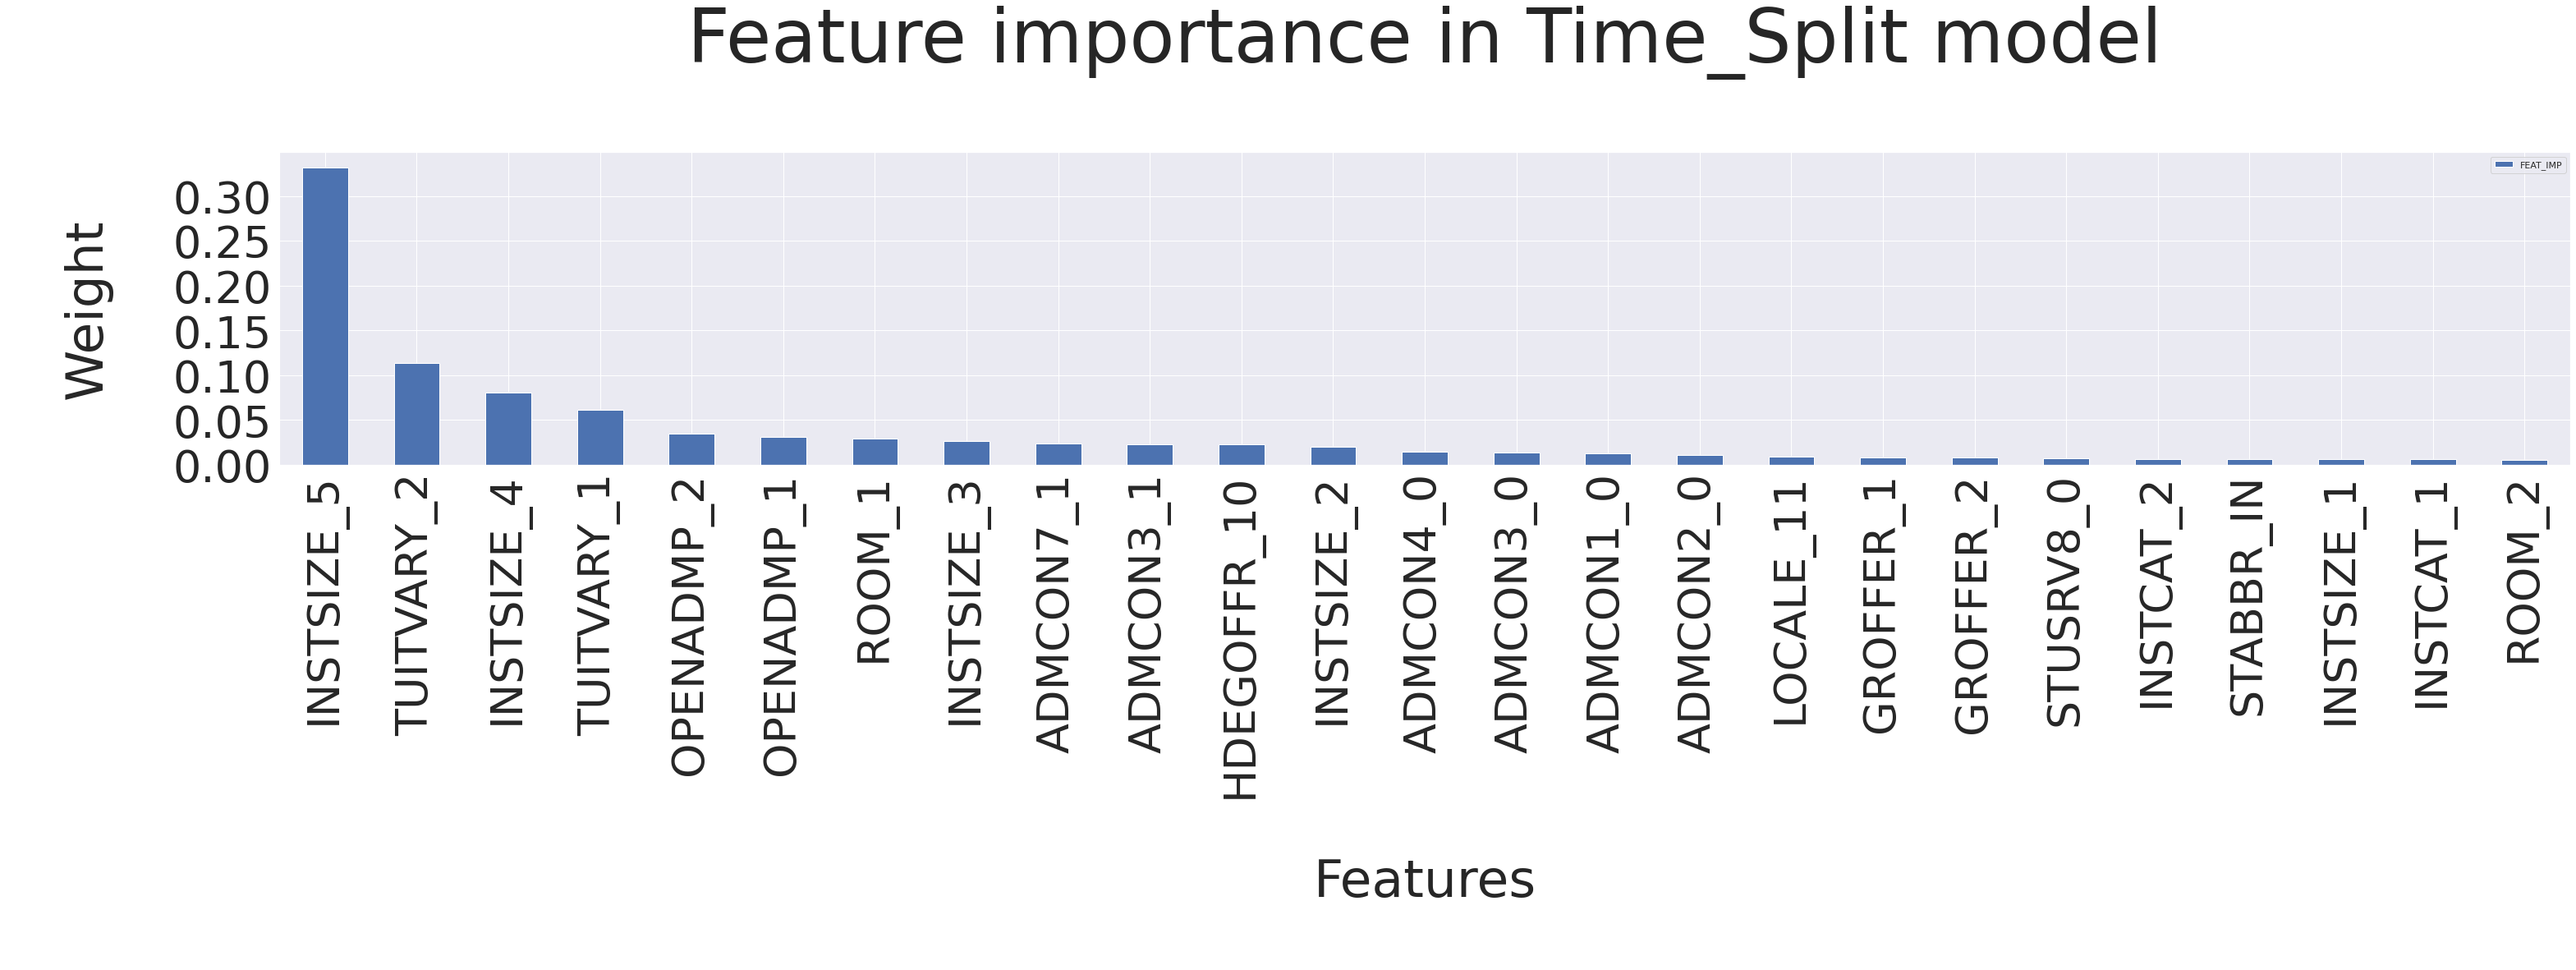

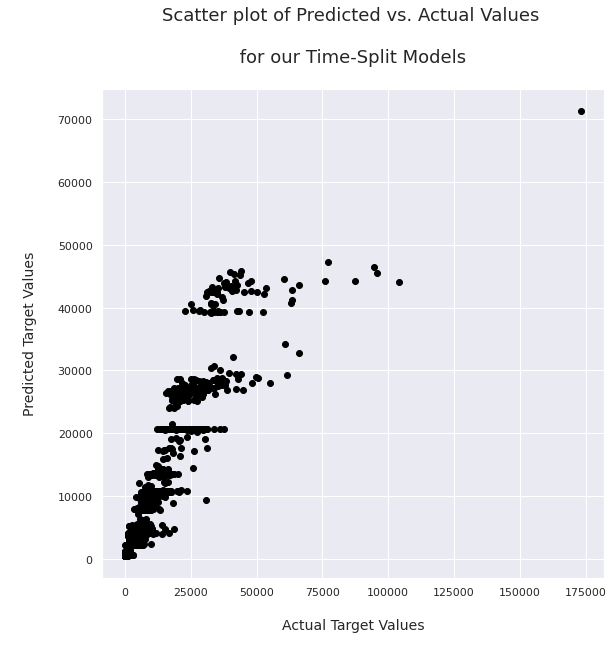

TRAIN: [   0    1    2 ... 6742 6743 6744] TEST: [ 6745  6746  6747 ... 10113 10114 10115]

Observations n: 10116 split n: 2

Training Observations: 6745 
Training Predictions: 6745

Testing Observations: 3371 
Testing Predictions: 3371
[14:44:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 84.49%

Testing Data Model Accuracy 
(R-squared for Testing Data): 71.15%

Mean absolute error (MAE) (train data):  1555.23 
Mean squared error (MSE) (train data):  16588727.63 
Root Mean squared error (RMSE) (train data):  4072.93 

Mean absolute error (MAE) (test data):  1438.73 
Mean squared error (MSE) (test data):  35604519.32 
Root Mean squared error (RMSE) (test data):  5966.95 



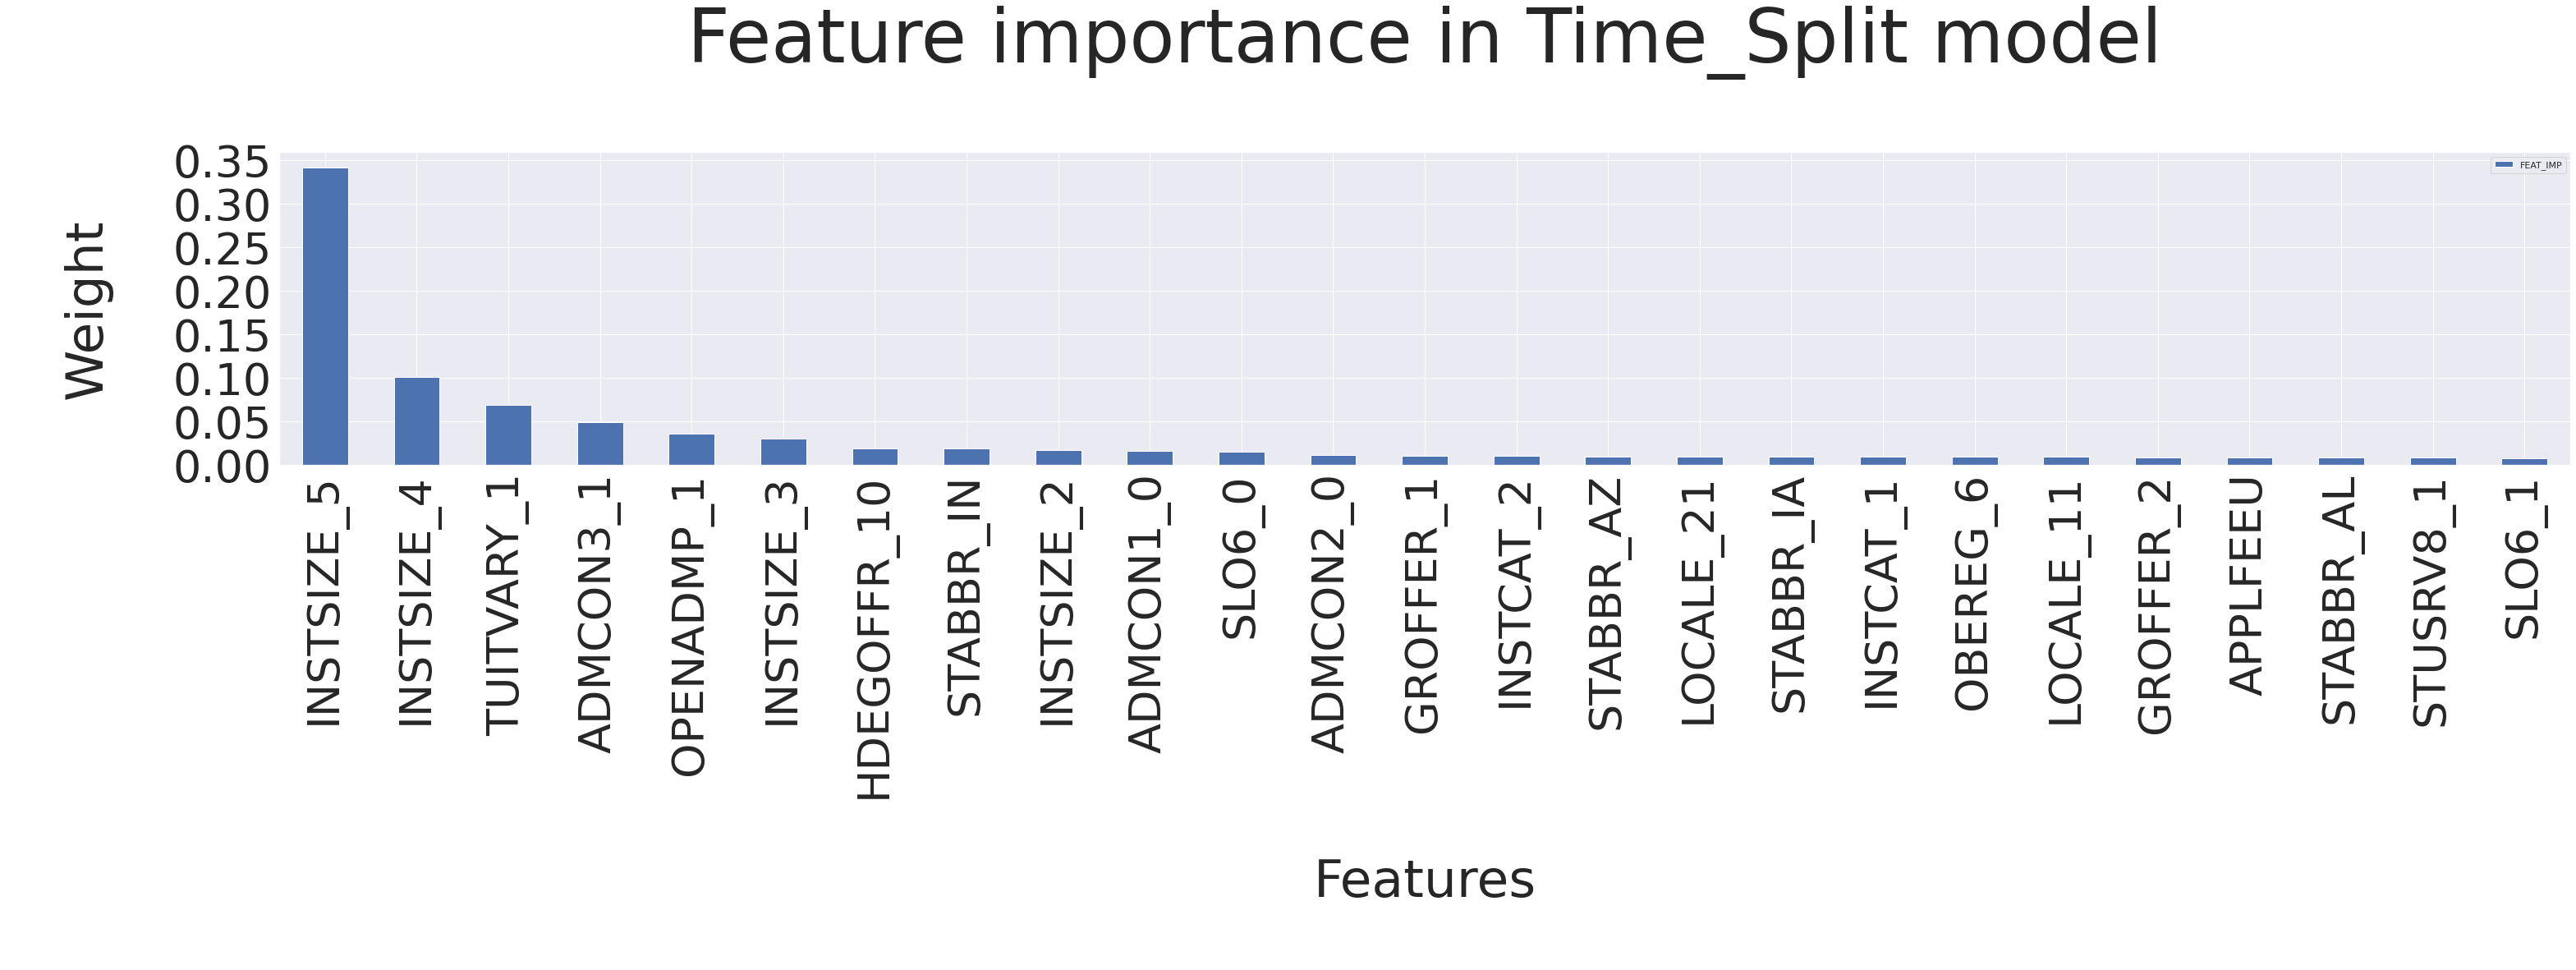

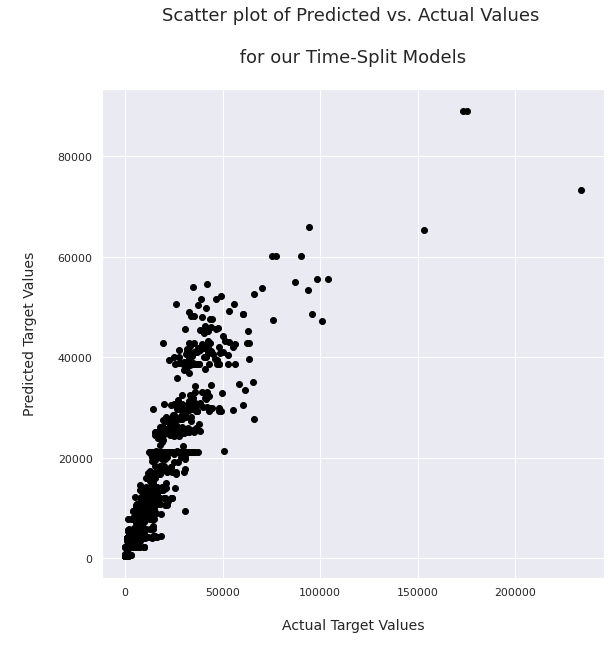

TRAIN: [    0     1     2 ... 10113 10114 10115] TEST: [10116 10117 10118 ... 13484 13485 13486]

Observations n: 13487 split n: 3

Training Observations: 10116 
Training Predictions: 10116

Testing Observations: 3371 
Testing Predictions: 3371
[14:45:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 85.08%

Testing Data Model Accuracy 
(R-squared for Testing Data): 84.28%

Mean absolute error (MAE) (train data):  1503.07 
Mean squared error (MSE) (train data):  16788952.9 
Root Mean squared error (RMSE) (train data):  4097.43 

Mean absolute error (MAE) (test data):  1448.76 
Mean squared error (MSE) (test data):  19075247.97 
Root Mean squared error (RMSE) (test data):  4367.52 



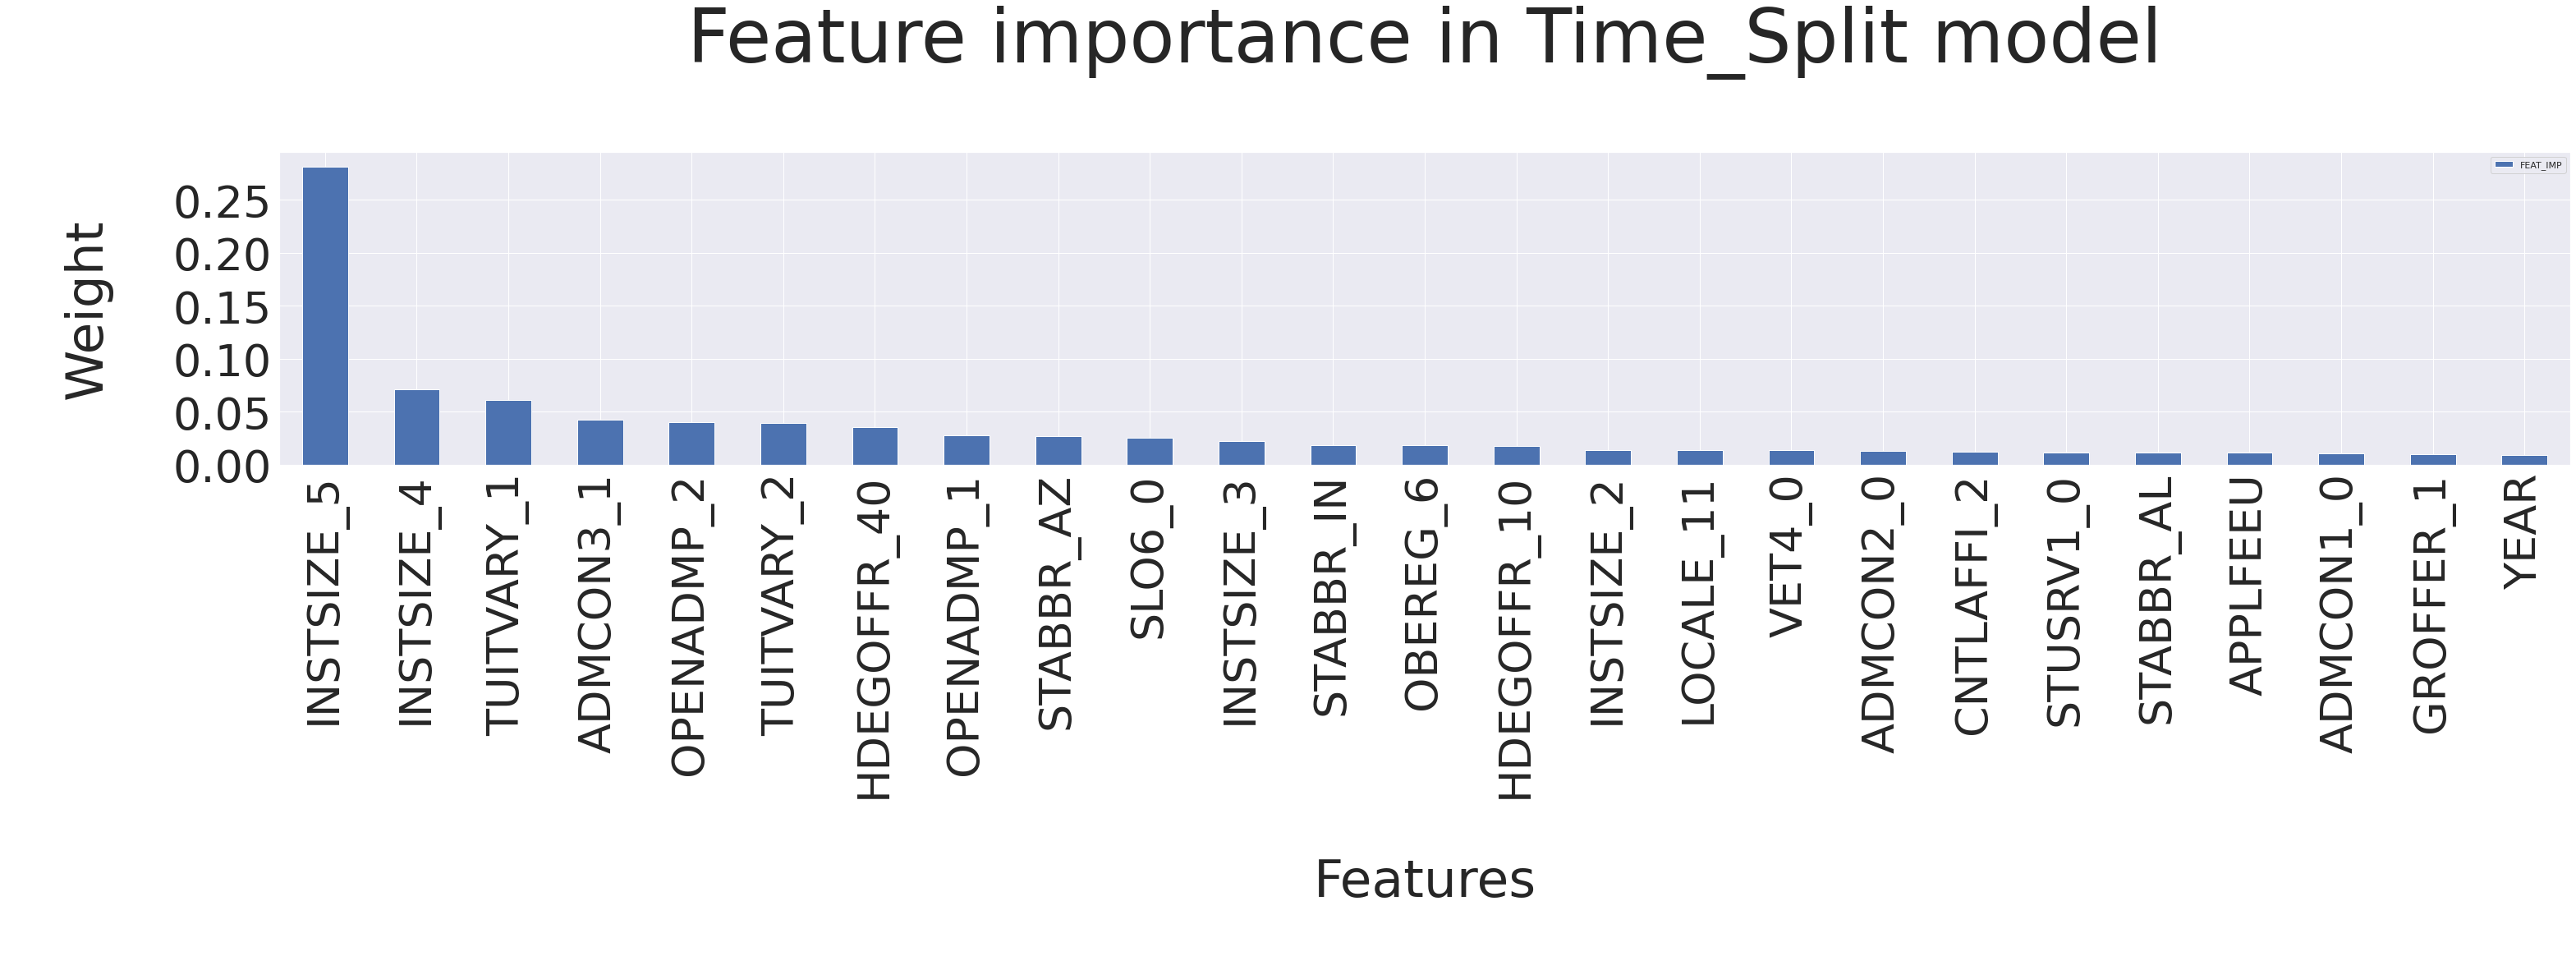

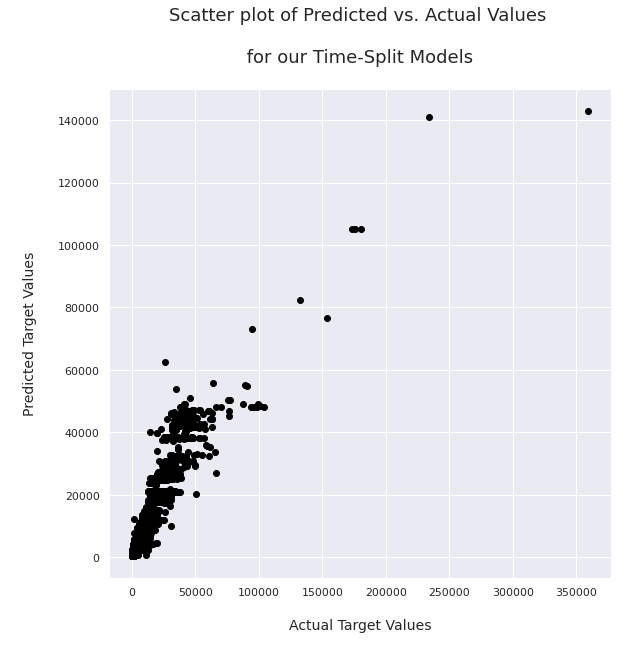

TRAIN: [    0     1     2 ... 13484 13485 13486] TEST: [13487 13488 13489 ... 16855 16856 16857]

Observations n: 16858 split n: 4

Training Observations: 13487 
Training Predictions: 13487

Testing Observations: 3371 
Testing Predictions: 3371
[14:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 86.50%

Testing Data Model Accuracy 
(R-squared for Testing Data): 87.89%

Mean absolute error (MAE) (train data):  1484.6 
Mean squared error (MSE) (train data):  15500062.88 
Root Mean squared error (RMSE) (train data):  3937.01 

Mean absolute error (MAE) (test data):  1489.99 
Mean squared error (MSE) (test data):  13562468.84 
Root Mean squared error (RMSE) (test data):  3682.73 



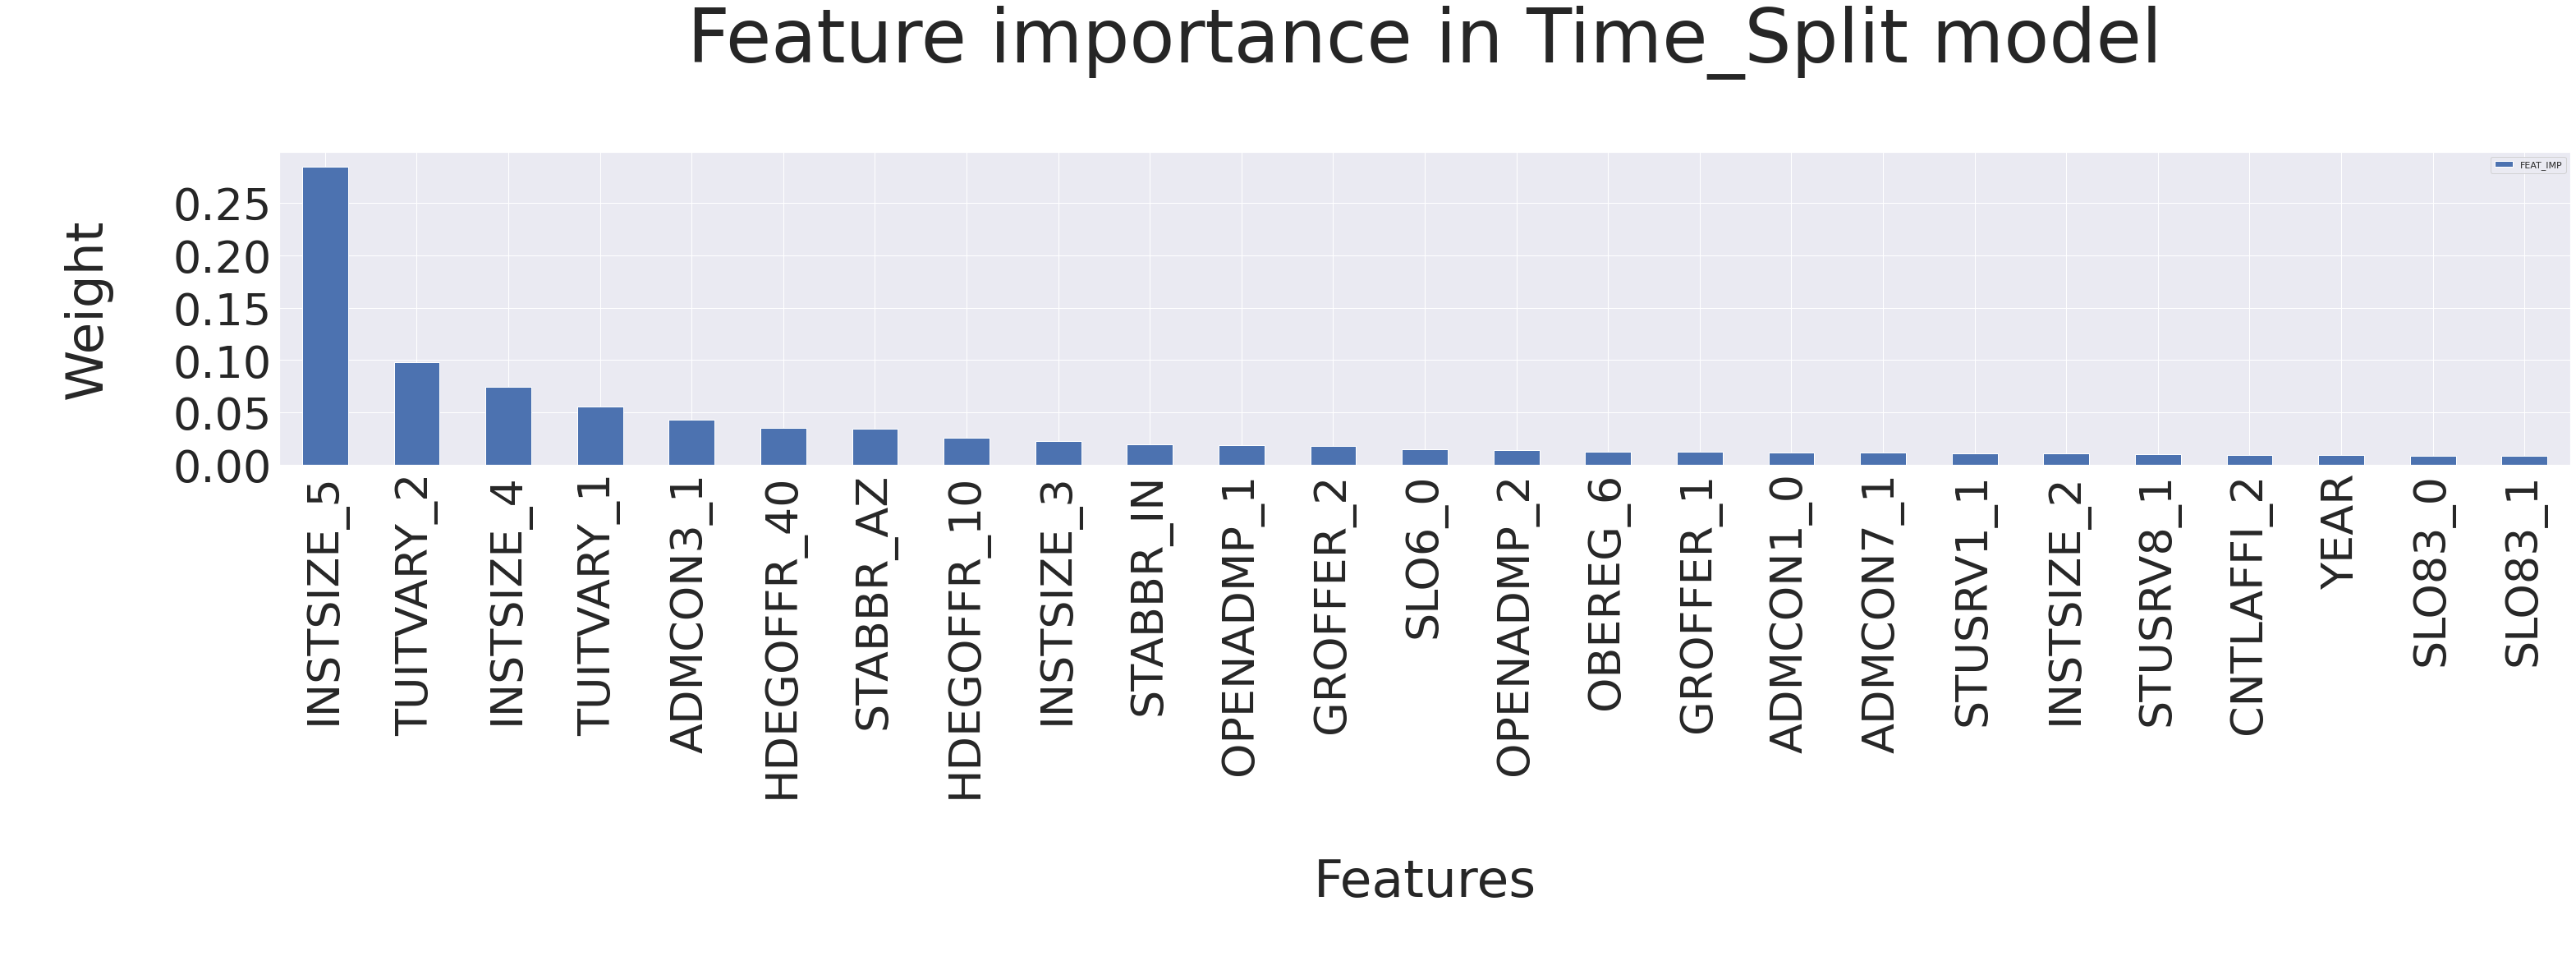

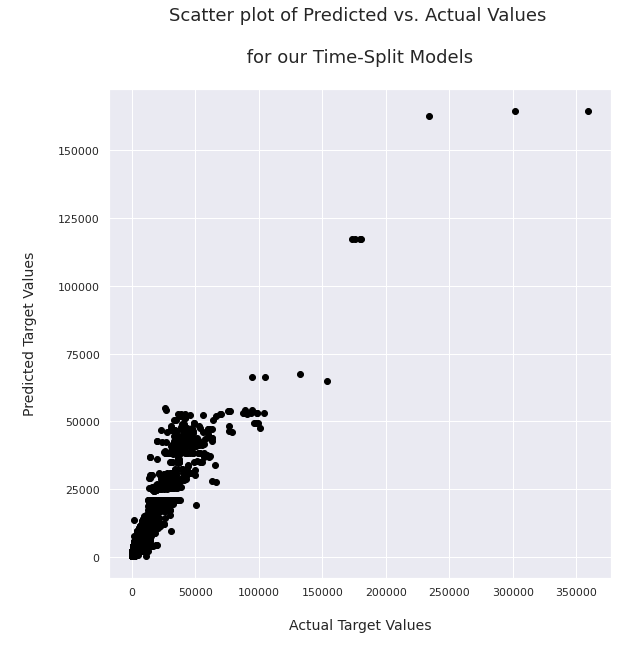

TRAIN: [    0     1     2 ... 16855 16856 16857] TEST: [16858 16859 16860 ... 20226 20227 20228]

Observations n: 20229 split n: 5

Training Observations: 16858 
Training Predictions: 16858

Testing Observations: 3371 
Testing Predictions: 3371
[14:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 87.89%

Testing Data Model Accuracy 
(R-squared for Testing Data): 88.77%

Mean absolute error (MAE) (train data):  1471.69 
Mean squared error (MSE) (train data):  13834327.48 
Root Mean squared error (RMSE) (train data):  3719.45 

Mean absolute error (MAE) (test data):  1470.52 
Mean squared error (MSE) (test data):  10583641.95 
Root Mean squared error (RMSE) (test data):  3253.25 



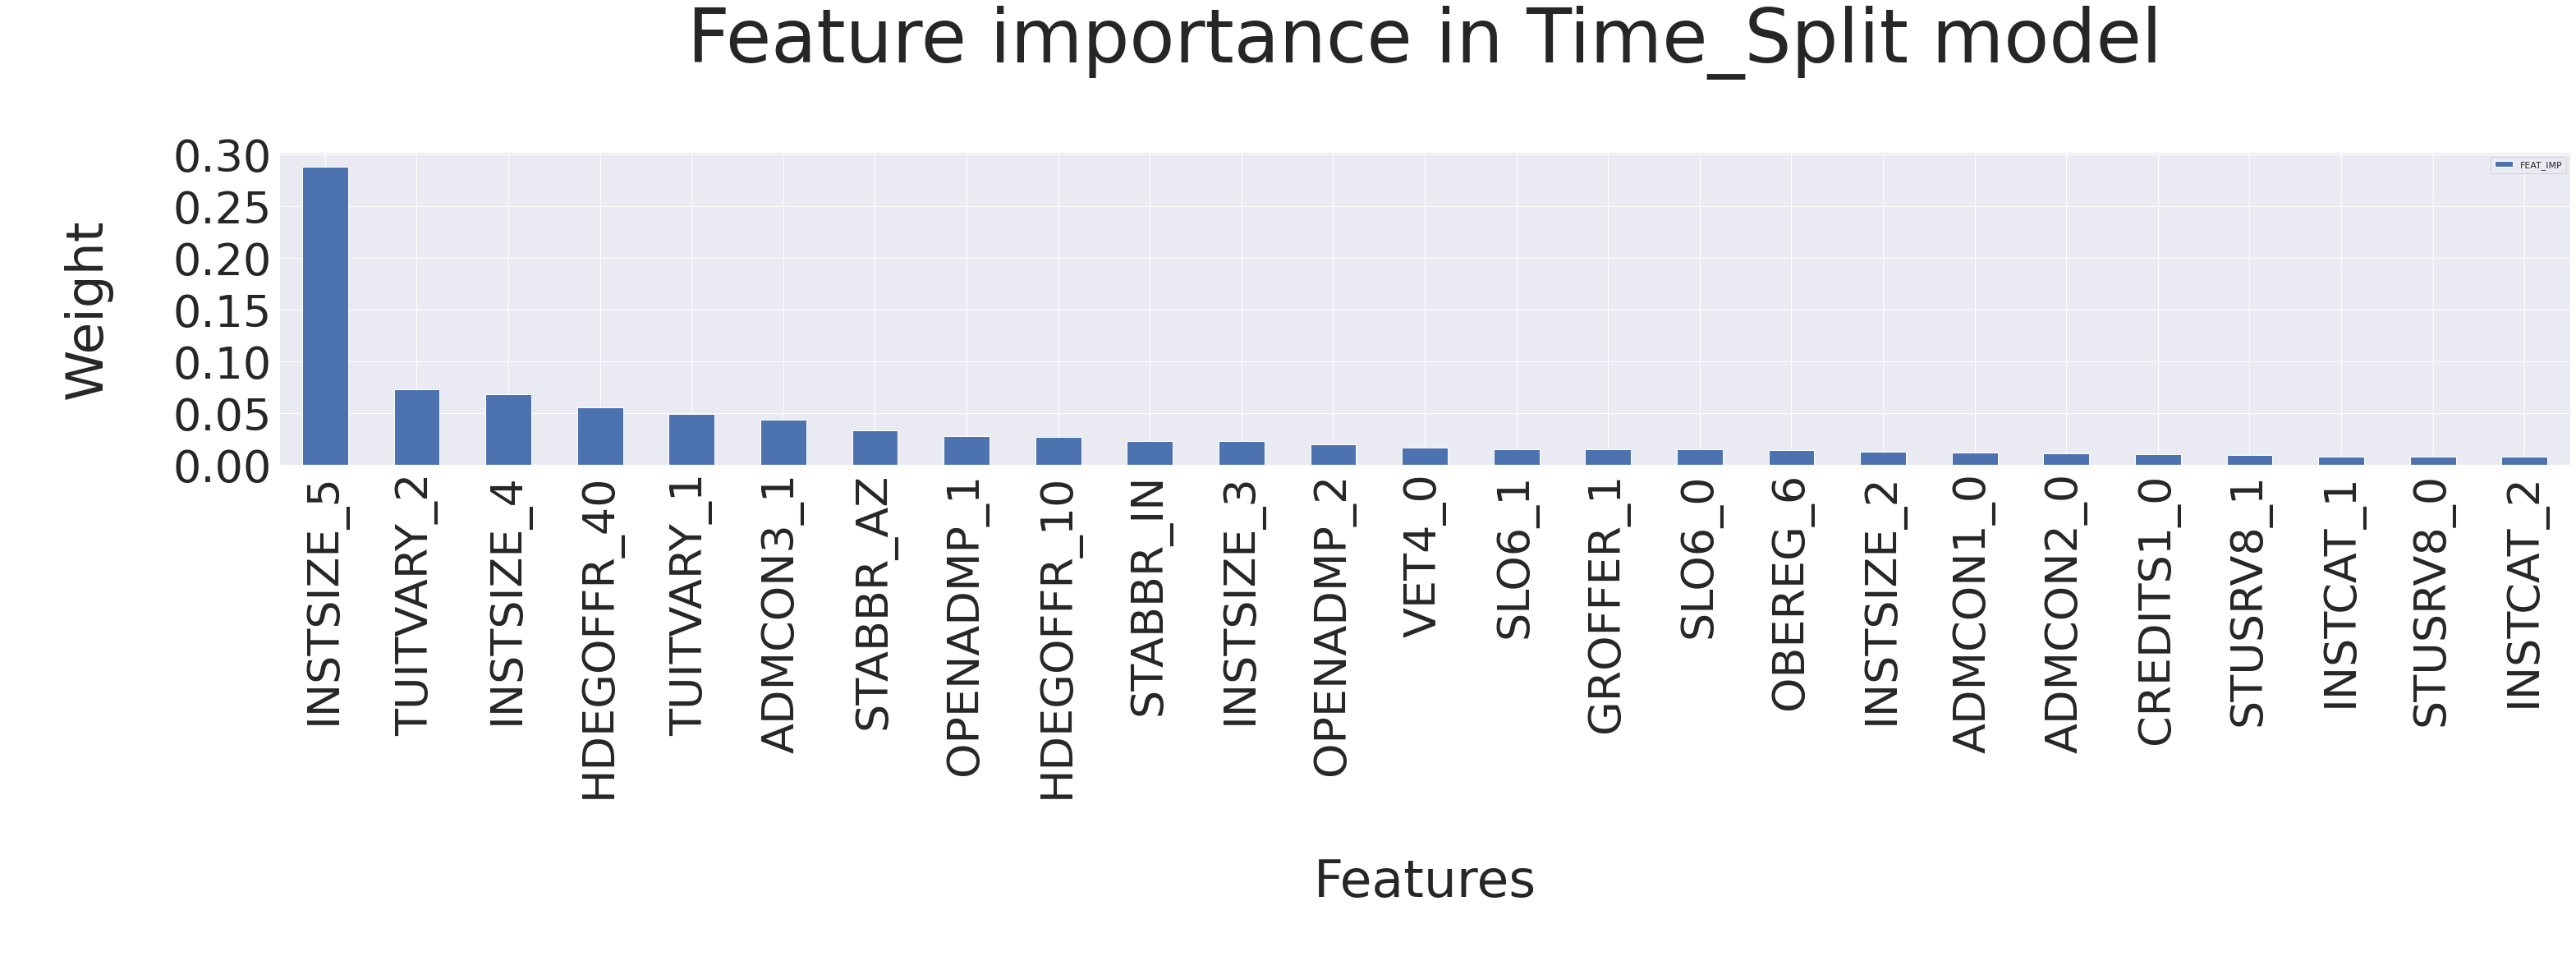

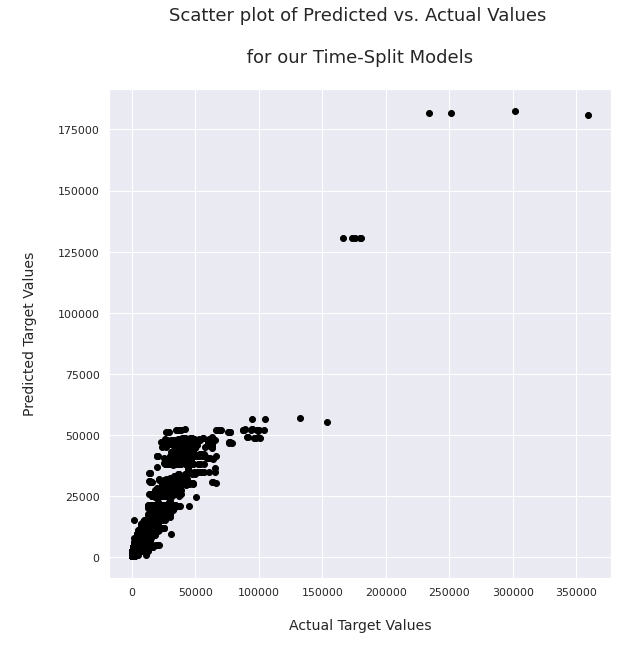

TRAIN: [    0     1     2 ... 20226 20227 20228] TEST: [20229 20230 20231 ... 23597 23598 23599]

Observations n: 23600 split n: 6

Training Observations: 20229 
Training Predictions: 20229

Testing Observations: 3371 
Testing Predictions: 3371
[14:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 88.52%

Testing Data Model Accuracy 
(R-squared for Testing Data): 87.20%

Mean absolute error (MAE) (train data):  1469.94 
Mean squared error (MSE) (train data):  12731716.0 
Root Mean squared error (RMSE) (train data):  3568.15 

Mean absolute error (MAE) (test data):  1482.8 
Mean squared error (MSE) (test data):  12513084.86 
Root Mean squared error (RMSE) (test data):  3537.38 



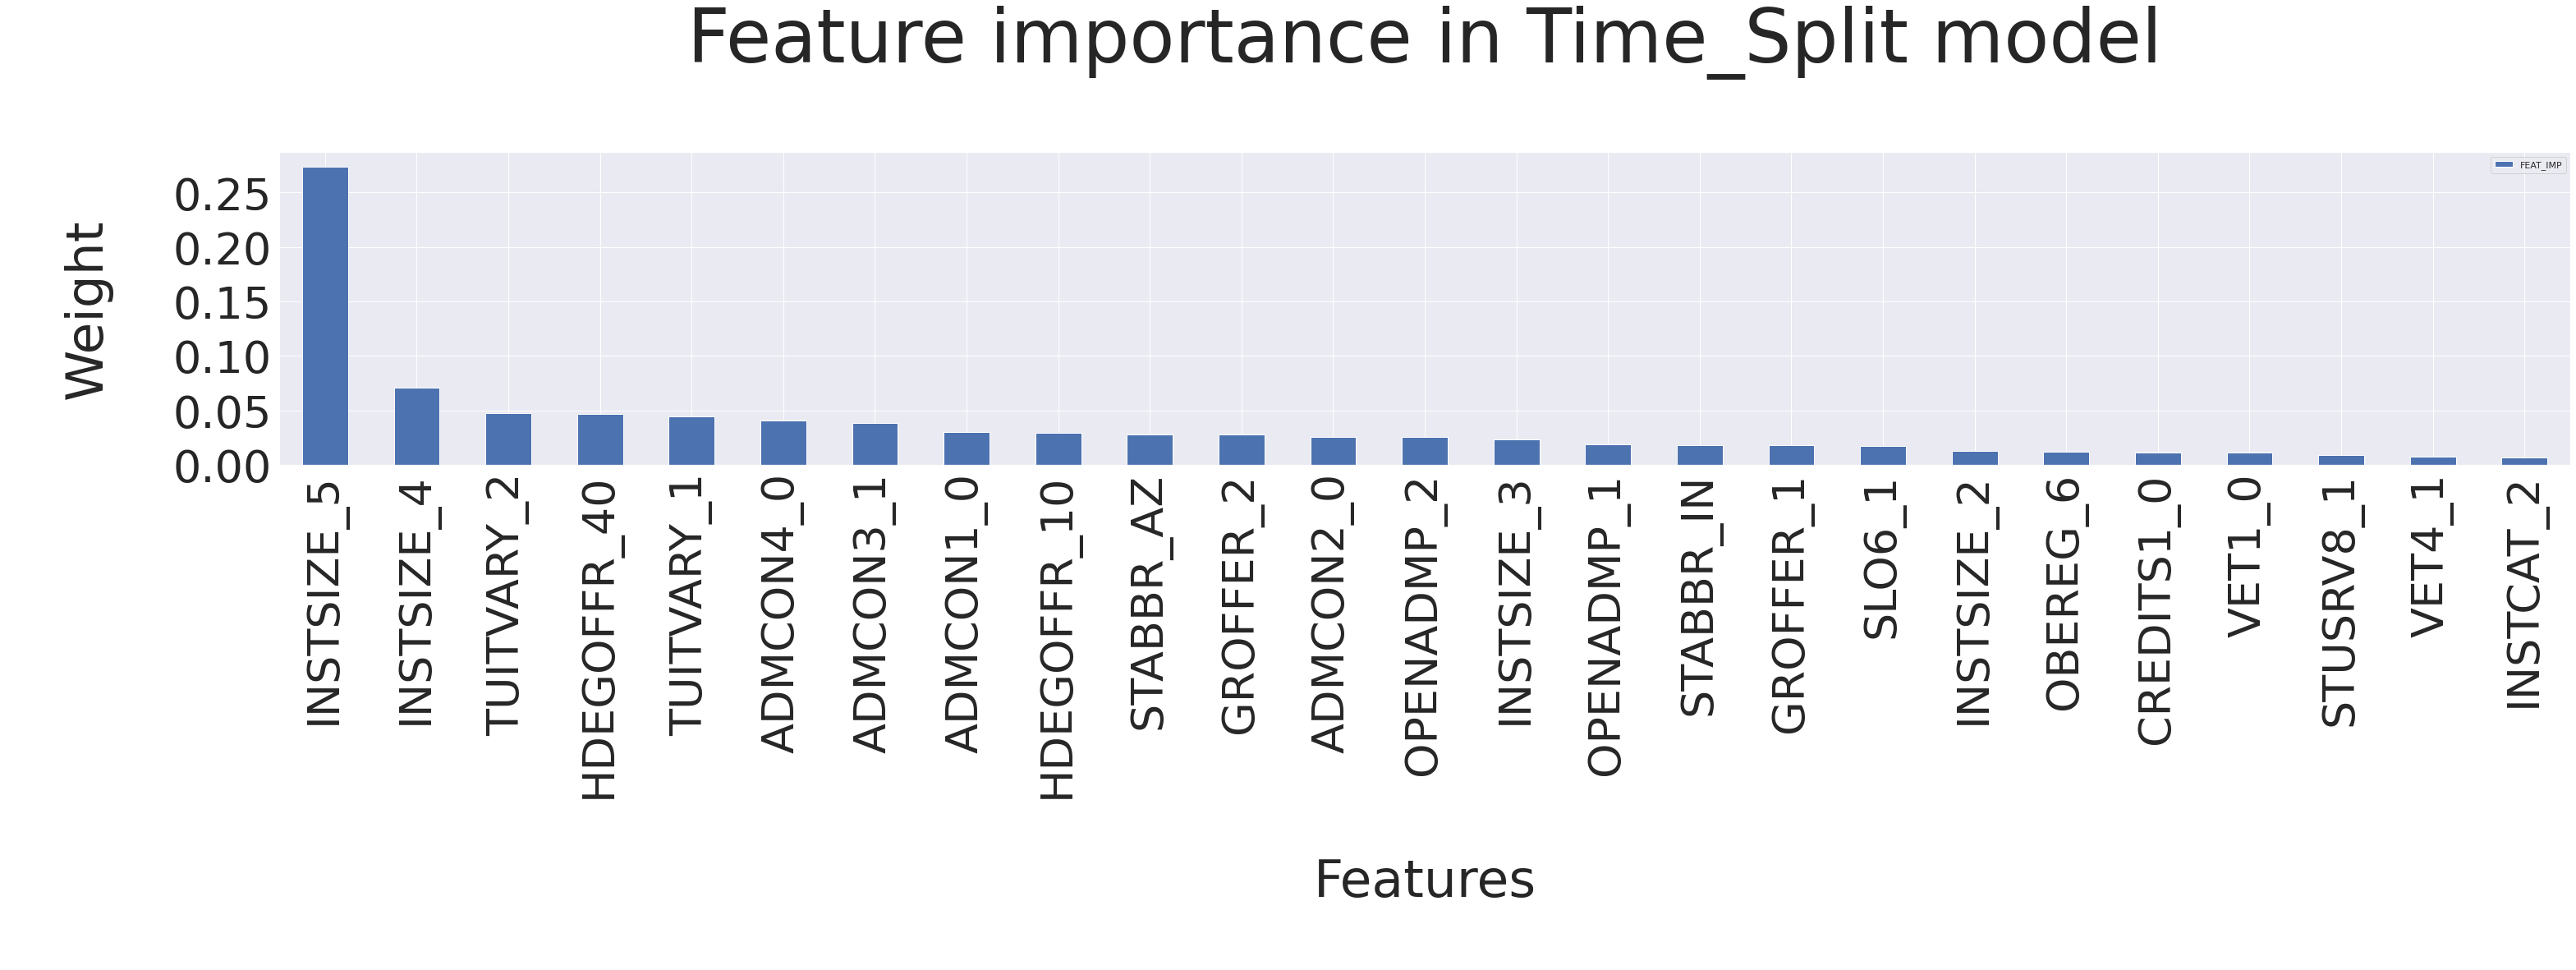

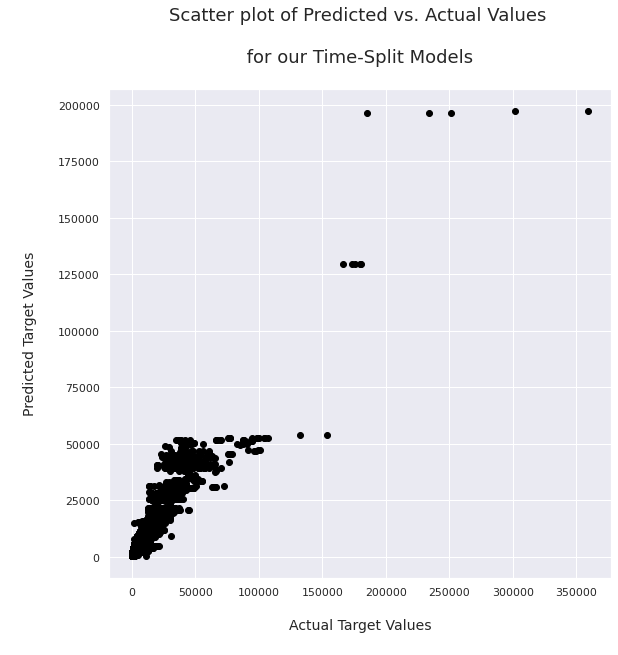

TRAIN: [    0     1     2 ... 23597 23598 23599] TEST: [23600 23601 23602 ... 26968 26969 26970]

Observations n: 26971 split n: 7

Training Observations: 23600 
Training Predictions: 23600

Testing Observations: 3371 
Testing Predictions: 3371
[14:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 88.01%

Testing Data Model Accuracy 
(R-squared for Testing Data): 85.72%

Mean absolute error (MAE) (train data):  1469.36 
Mean squared error (MSE) (train data):  13068981.61 
Root Mean squared error (RMSE) (train data):  3615.1 

Mean absolute error (MAE) (test data):  1592.41 
Mean squared error (MSE) (test data):  14693800.84 
Root Mean squared error (RMSE) (test data):  3833.25 



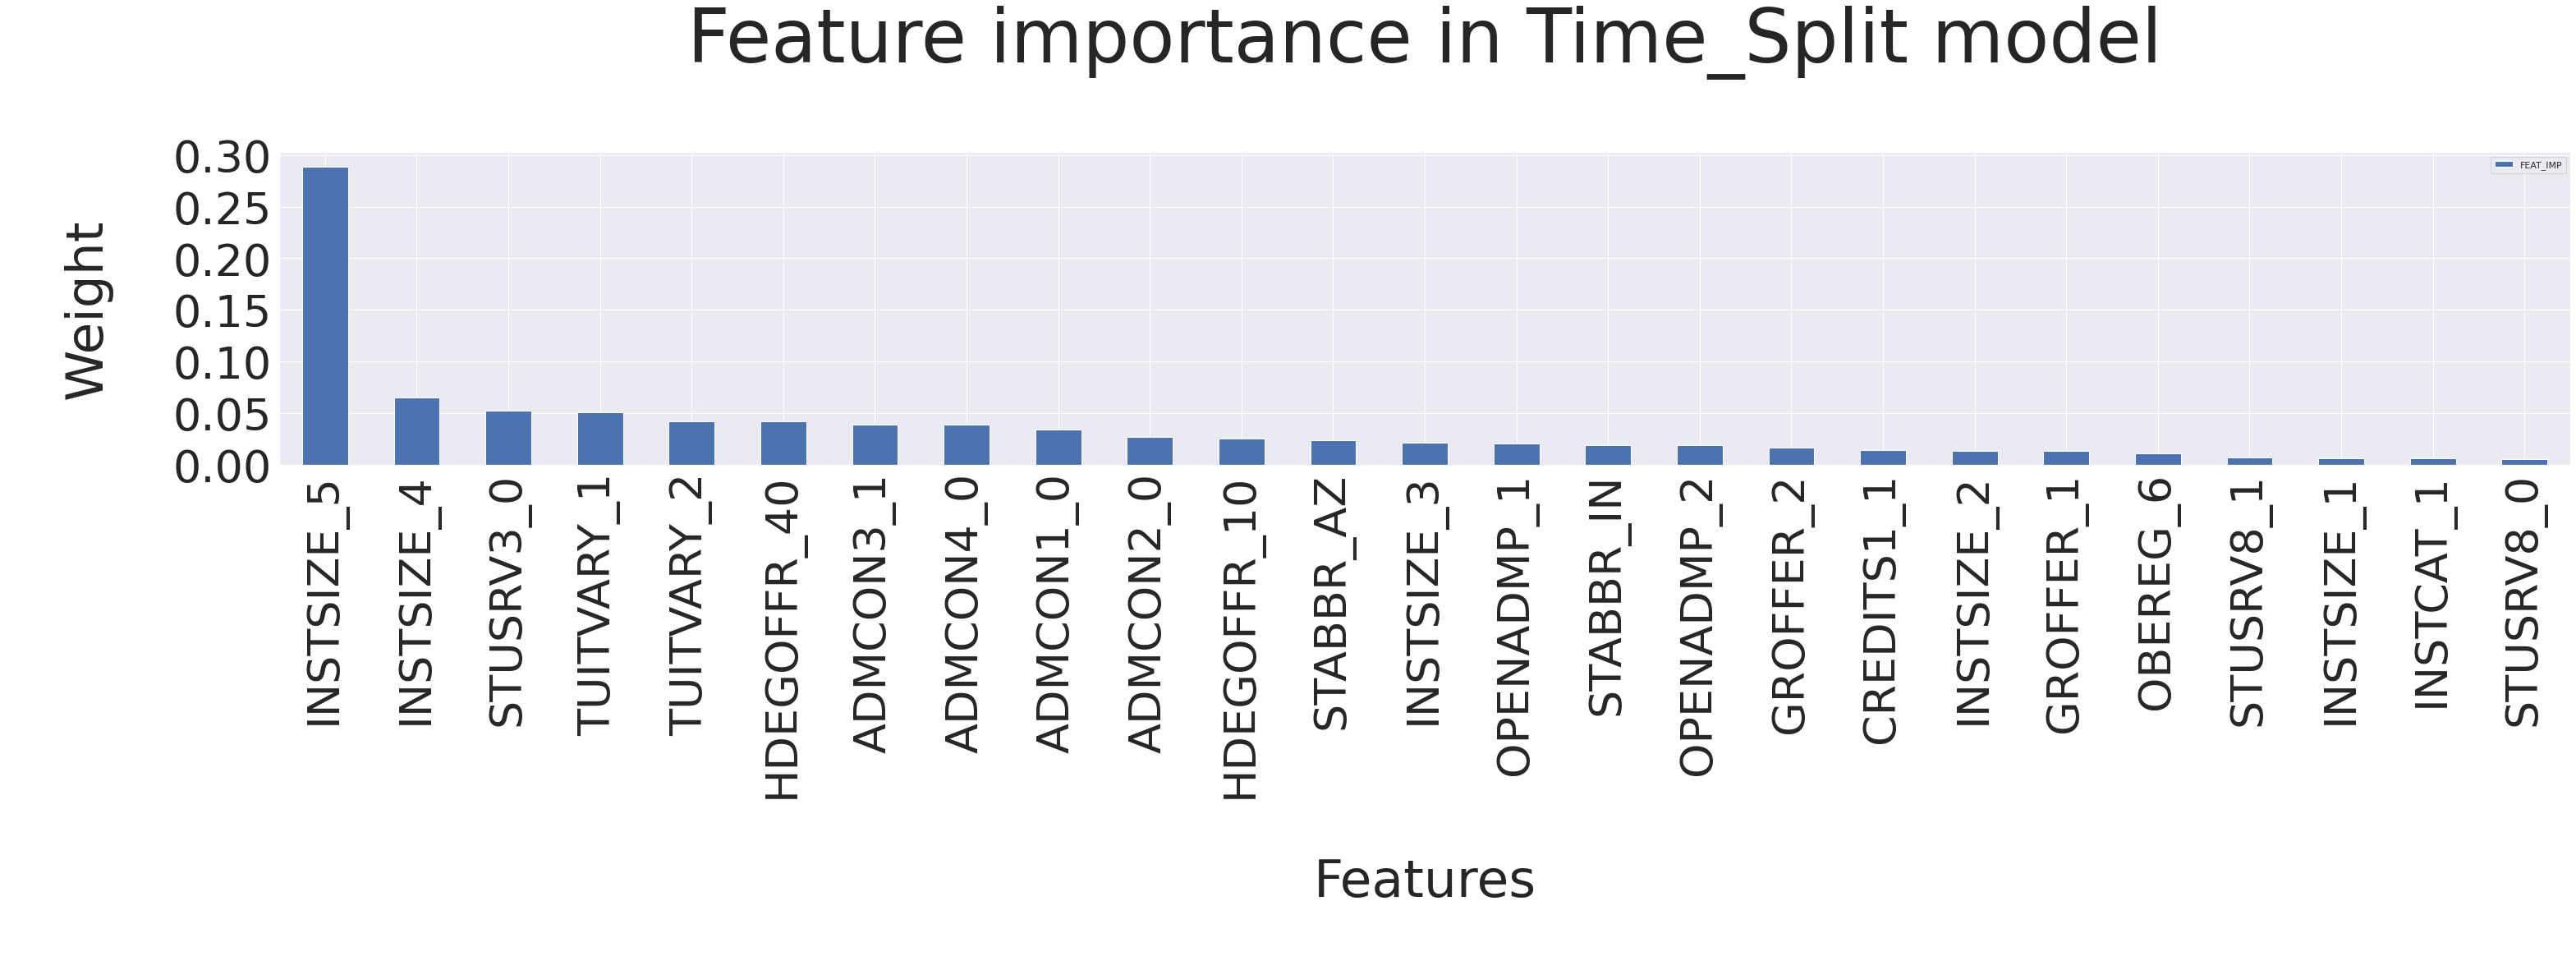

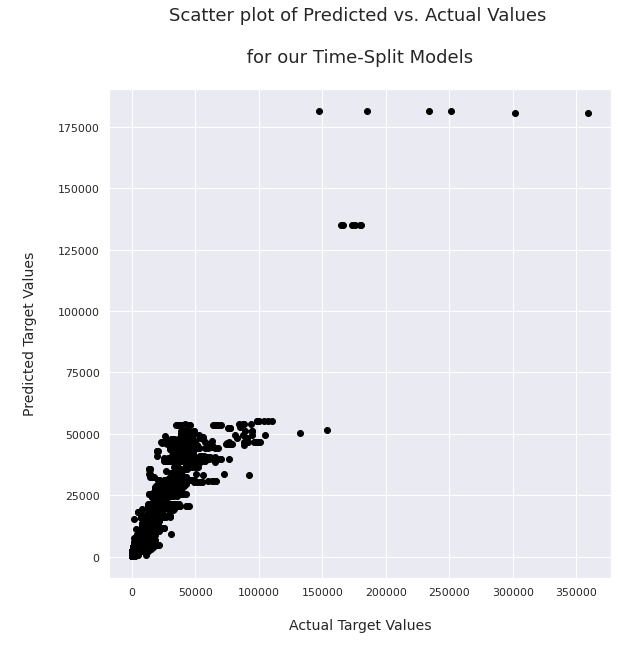

TRAIN: [    0     1     2 ... 26968 26969 26970] TEST: [26971 26972 26973 ... 30339 30340 30341]

Observations n: 30342 split n: 8

Training Observations: 26971 
Training Predictions: 26971

Testing Observations: 3371 
Testing Predictions: 3371
[14:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 87.73%

Testing Data Model Accuracy 
(R-squared for Testing Data): 83.54%

Mean absolute error (MAE) (train data):  1485.61 
Mean squared error (MSE) (train data):  13284773.07 
Root Mean squared error (RMSE) (train data):  3644.83 

Mean absolute error (MAE) (test data):  1640.62 
Mean squared error (MSE) (test data):  17346218.72 
Root Mean squared error (RMSE) (test data):  4164.88 



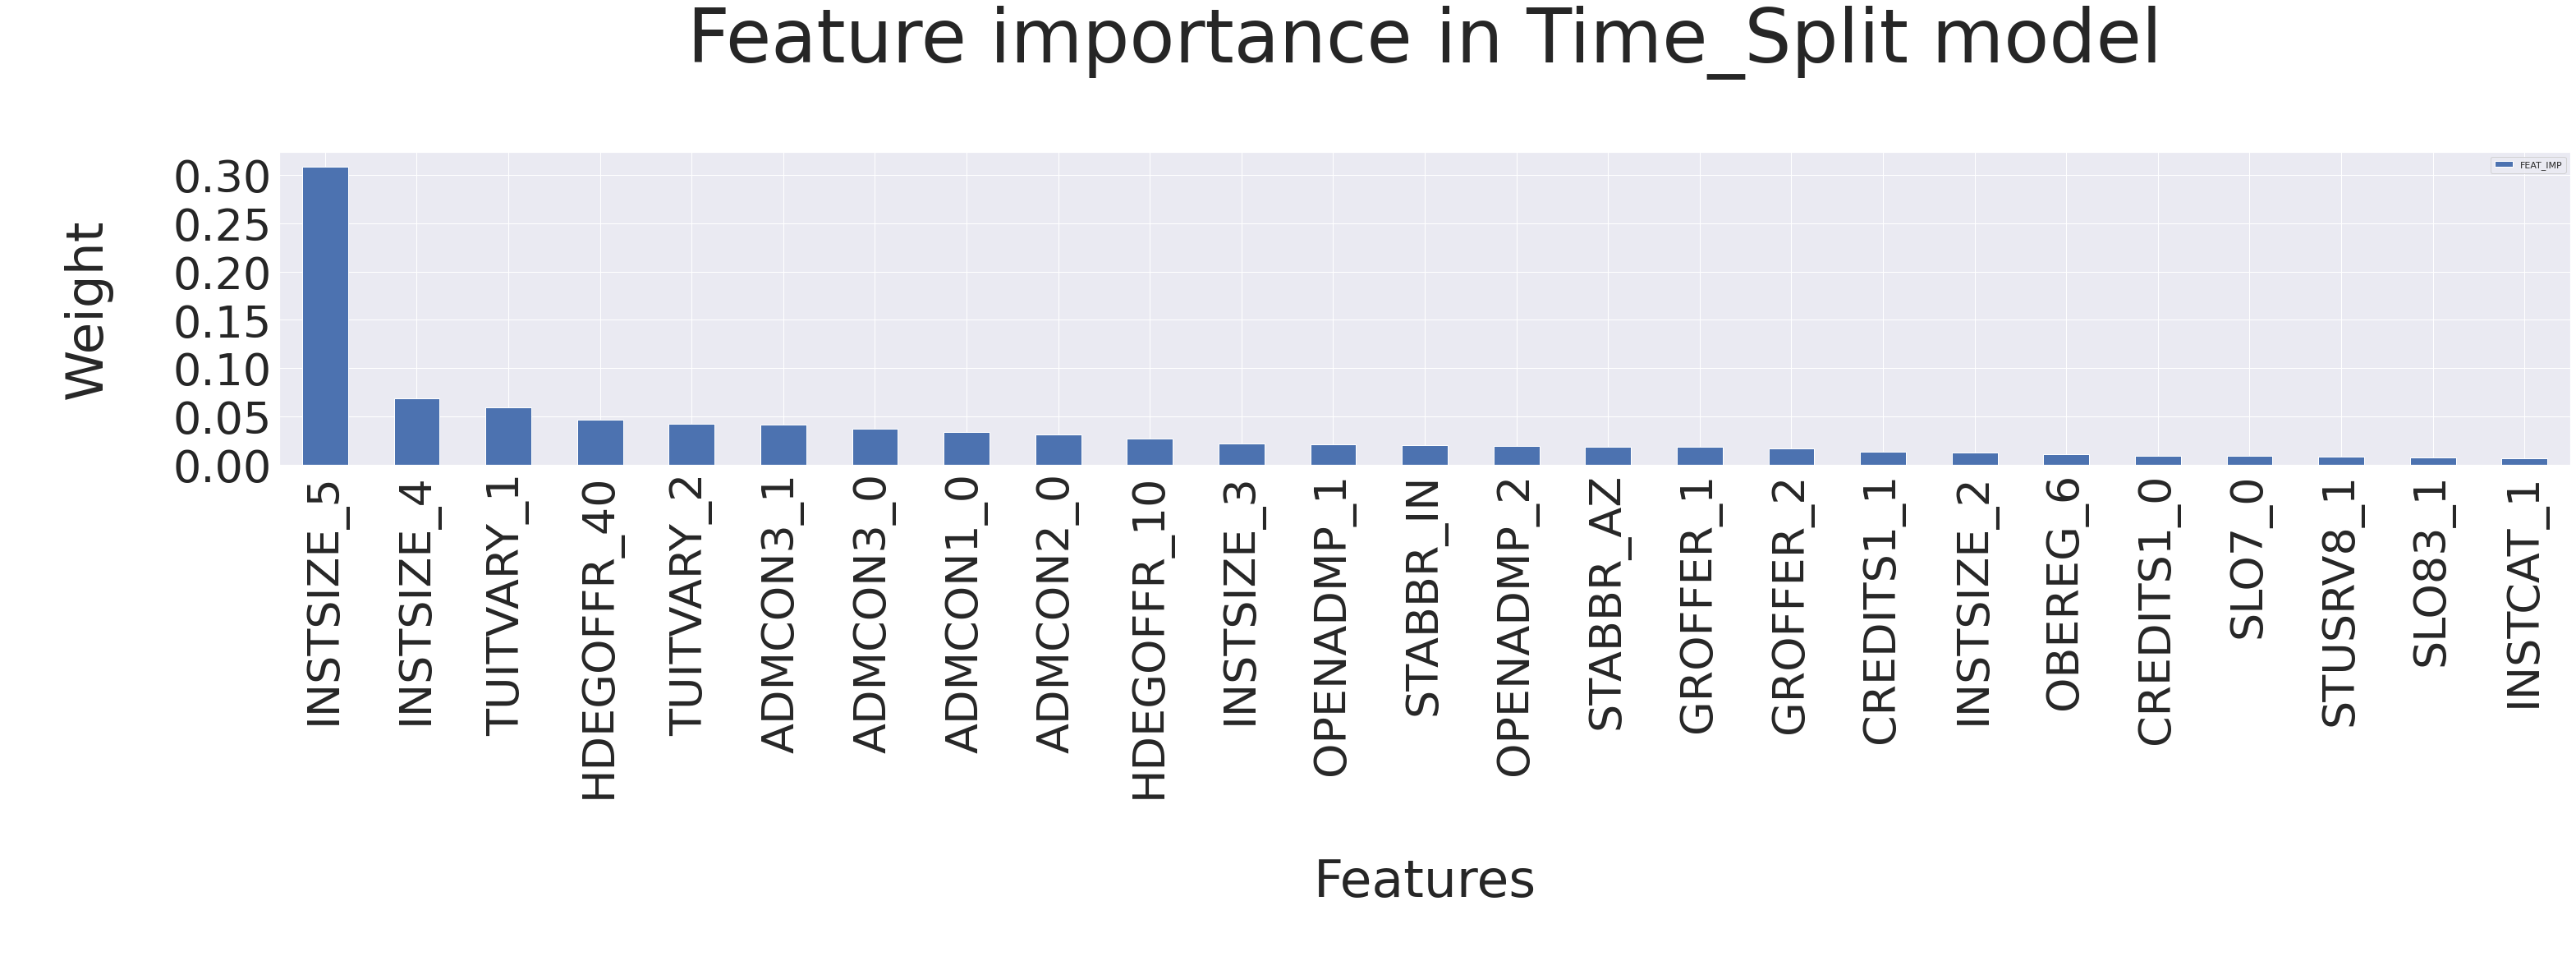

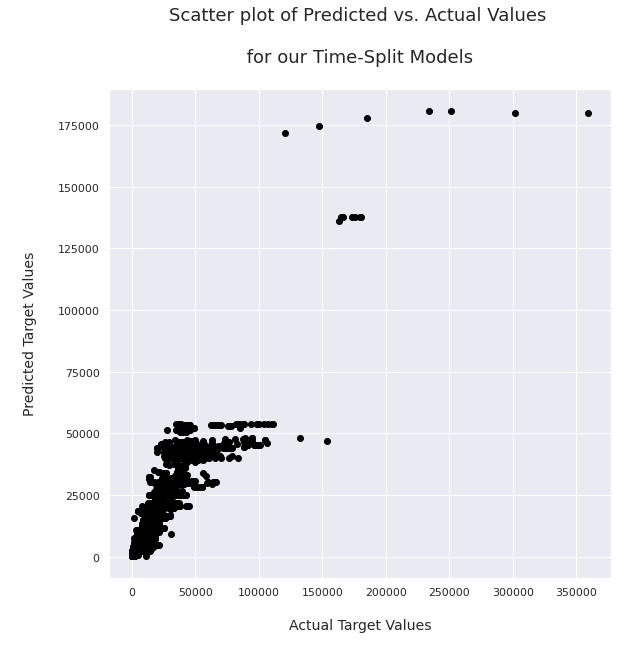

TRAIN: [    0     1     2 ... 30339 30340 30341] TEST: [30342 30343 30344 ... 33710 33711 33712]

Observations n: 33713 split n: 9

Training Observations: 30342 
Training Predictions: 30342

Testing Observations: 3371 
Testing Predictions: 3371
[14:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training Data Model Accuracy 
(R-squared for Training Data): 87.56%

Testing Data Model Accuracy 
(R-squared for Testing Data): 84.05%

Mean absolute error (MAE) (train data):  1498.23 
Mean squared error (MSE) (train data):  13428673.08 
Root Mean squared error (RMSE) (train data):  3664.52 

Mean absolute error (MAE) (test data):  1660.94 
Mean squared error (MSE) (test data):  18527228.92 
Root Mean squared error (RMSE) (test data):  4304.33 



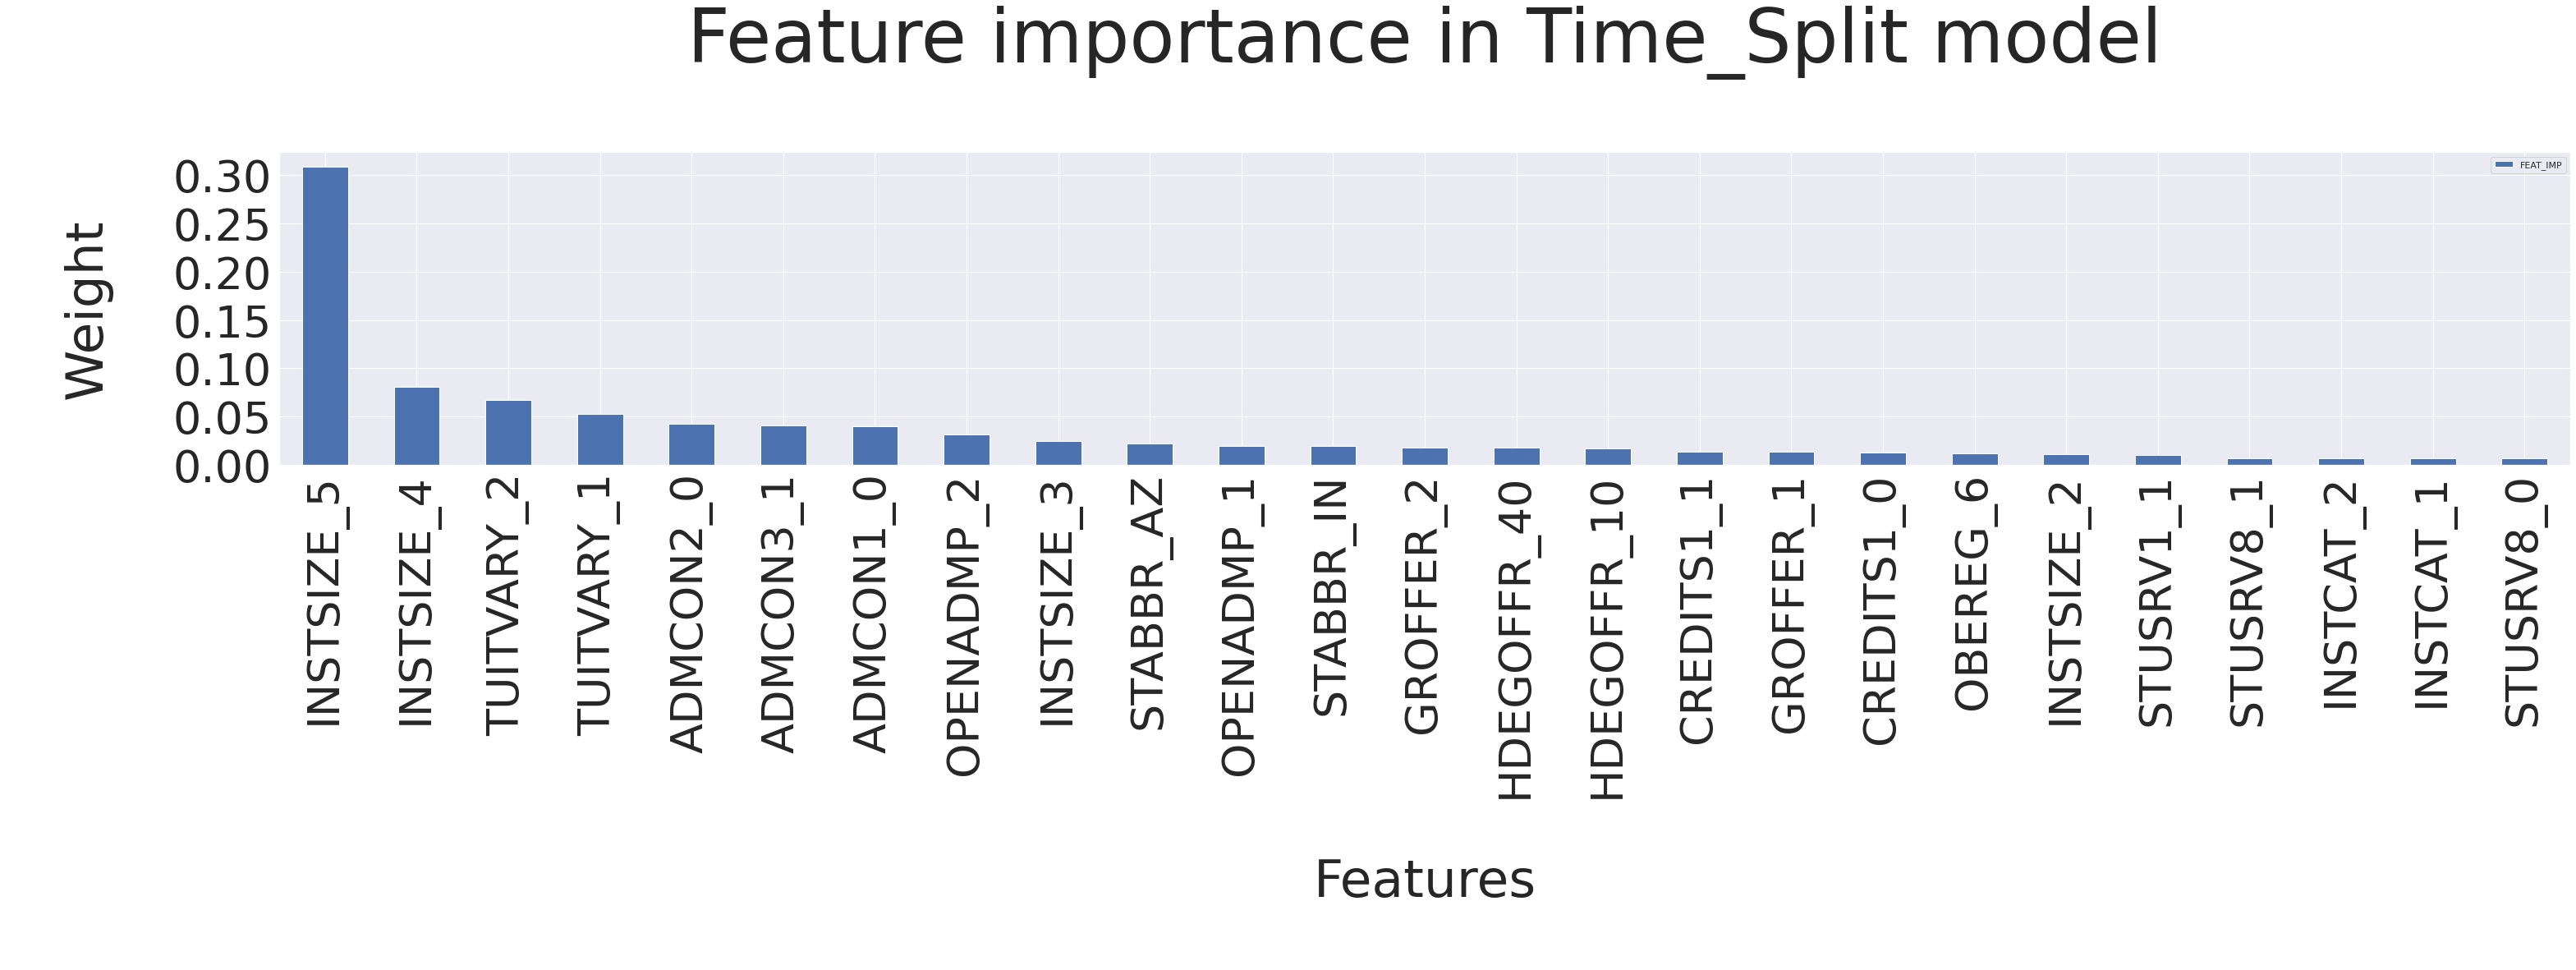

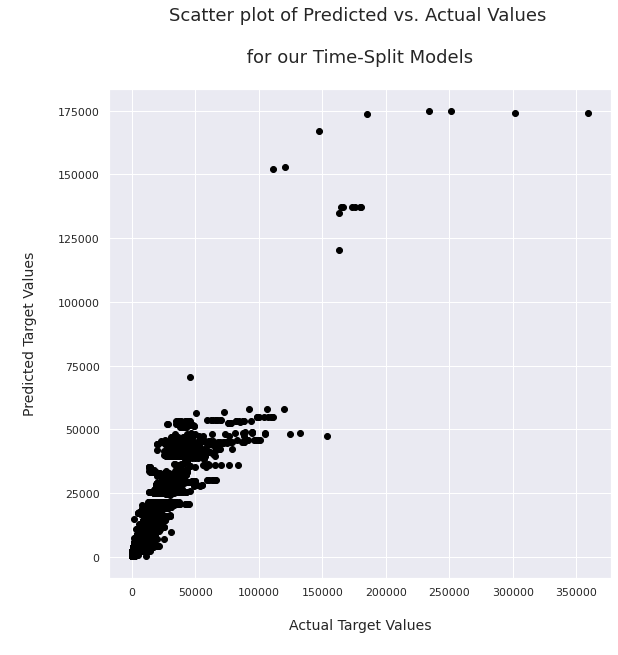


The Model Accuracy or R-Squared represents the fraction of response variance captured by the model (a 'standardized' Mean Squared Error) 


The larger value of the MSE on the test dataset the more problematic is the model's performance. 
The smaller the MSE, in fact, the closer the fit is to the data. 

The RMSE is however a better and more easily interpretable measure of theerror. 
For our model, the RMSE tells us directly how many students we are off on average in our yearly prediction of Enrollment Numbers.
 The presence of outilers is surely affecting our predictions, as is the wide variety in Institutional size.


In [82]:
# # https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 
# # https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 
# # # https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html?highlight=columntransformer
# # https://scikit-learn.org/stable/modules/cross_validation.html
# # https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/
# # https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

# # Parameters for Gradient Boosting https://machinelearningmastery.com/configure-gradient-boosting-algorithm/



from sklearn.model_selection import TimeSeriesSplit

X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values
splits = TimeSeriesSplit(n_splits=9)
i = 1
for train_index, test_index in splits.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  print('\nObservations n: %d' % (len(X_train) + len(X_test)), 'split n:', i)
  print('\nTraining Observations: %d' % (len(X_train)), '\nTraining Predictions: %d' % (len(y_train)))
  print('\nTesting Observations: %d' % (len(X_test)), '\nTesting Predictions: %d' % (len(y_test)))
  X_train = pd.DataFrame(X_train)
  y_train = pd.DataFrame(y_train)
  X_test = pd.DataFrame(X_test)
  y_test = pd.DataFrame(y_test)
  X_train.set_axis(['YEAR', 'STABBR', 'OBEREG', 'HDEGOFFR', 'GROFFER', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                    'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                    'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP', 'RMANDBRDAMT',
                    'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM'], axis=1, inplace=True)
  X_test.set_axis(['YEAR', 'STABBR', 'OBEREG', 'HDEGOFFR', 'GROFFER', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                   'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                   'ATHASSOC', 'APPLFEEU', 'TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP', 'RMANDBRDAMT',
                   'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9', 'SATNUM', 'ACTNUM'], axis=1, inplace=True)
  y_train.set_axis(['EFYTOTLT'], axis=1, inplace=True) 
  y_test.set_axis(['EFYTOTLT'], axis=1, inplace=True) 

  X_train[['YEAR','APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM']]=X_train[['YEAR','APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM']].apply(pd.to_numeric)
  X_test[['YEAR','APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM']]=X_test[['YEAR','APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM']].apply(pd.to_numeric)
  y_train[['EFYTOTLT']]=y_train[['EFYTOTLT']].apply(pd.to_numeric)
  y_test[['EFYTOTLT']]=y_test[['EFYTOTLT']].apply(pd.to_numeric)

  numeric_features = ['YEAR','APPLFEEU','RMANDBRDAMT','SATNUM','ACTNUM']
  numeric_transformer = RobustScaler()
  numeric_out =['EFYTOTLT']

  categorical_features = ['STABBR', 'OBEREG', 'HDEGOFFR', 'GROFFER', 'HBCU','LOCALE', 'INSTCAT', 'INSTSIZE', 'CNTLAFFI', 'OPENADMP', 'CREDITS1',
                          'CREDITS2', 'CREDITS3', 'CREDITS4', 'SLO5', 'SLO6', 'SLO7', 'SLO83','STUSRV1', 'STUSRV2', 'STUSRV3', 'STUSRV4', 'STUSRV8', 'LIBRES1',
                          'ATHASSOC','TUITVARY', 'ROOM', 'BOARD', 'TUITPL', 'VET1','VET2', 'VET3', 'VET4', 'VET5', 'DSTNUGC', 'DSTNUGP', 
                          'ADMCON1', 'ADMCON2', 'ADMCON3', 'ADMCON4', 'ADMCON5', 'ADMCON6','ADMCON7', 'ADMCON8', 'ADMCON9']
  categorical_transformer = OneHotEncoder(categories='auto', handle_unknown="ignore", sparse=False)

  scaler = ColumnTransformer(
      transformers=[
          ("num", numeric_transformer, numeric_features),
          ("cat", categorical_transformer, categorical_features)
      ]
  )

  scaler_y = RobustScaler()

  model_xgboost = XGBRFRegressor(learning_rate= 1, max_depth= 5, n_estimators=100, subsample=0.7, colsample_bynode=0.8)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
  clf = Pipeline(
      steps=[("preprocessor", scaler),("out_prep", scaler_y), ("regressor", model_xgboost)]
  )


  clf.fit(X_train, y_train)
  # 
  # Model Performance on training data AND on testing data
  scores_accuracy_train = clf.score(X_train, y_train)
  print("\nTraining Data Model Accuracy \n(R-squared for Training Data): %.2f%%\n" % (scores_accuracy_train*100))
  scores_accuracy_test = clf.score(X_test, y_test)
  print("Testing Data Model Accuracy \n(R-squared for Testing Data): %.2f%%\n" % (scores_accuracy_test*100))

  y_test_scaled_predicted = clf.predict(X_test)

  y_train_scaled_predicted = clf.predict(X_train)

  feature_importance()


  # print("\nR-Squared (test data): ", round((r2_score(y_test, y_test_scaled_predicted)*100), 2), '%\n')
  # print("\nThe Model Accuracy or R-Squared represents the fraction of response variance captured by the model (a 'standardized' Mean Squared Error) \n\n")

  print("Mean absolute error (MAE) (train data): ", round((mean_absolute_error(y_train, y_train_scaled_predicted)), 2), '')
  print("Mean squared error (MSE) (train data): ", round((mean_squared_error(y_train, y_train_scaled_predicted)), 2),'')
  print("Root Mean squared error (RMSE) (train data): ", round((np.sqrt(mean_squared_error(y_train, y_train_scaled_predicted))), 2),'\n')
  
  print("Mean absolute error (MAE) (test data): ", round((mean_absolute_error(y_test, y_test_scaled_predicted)), 2),'')
  print("Mean squared error (MSE) (test data): ", round((mean_squared_error(y_test, y_test_scaled_predicted)), 2),'')
  print("Root Mean squared error (RMSE) (test data): ", round((np.sqrt(mean_squared_error(y_test, y_test_scaled_predicted))), 2),'\n')

  # print("The larger value of the MSE on the test dataset the more problematic is the model's performance (Overfitting)\n\n")

  # print("R-Squared (train data): ", round((r2_score(y_train, y_train_scaled_predicted)*100), 2), '%\n')

  sns.set(rc = {'figure.figsize':(9,9)})

  fig, ax = plt.subplots()
  ax.scatter(y_train, y_train_scaled_predicted,  color='black')
  ax.set_title("Scatter plot of Predicted vs. Actual Values \n \n for our Time-Split Models \n", fontsize=18)
  ax.set_xlabel("\nActual Target Values\n", fontsize=14)
  ax.set_ylabel("\nPredicted Target Values\n", fontsize=14)
  # plt.add_artist(lines.Line2D((0, 0), (1, 1), linewidth=4, color='r'))
  # ax.line(xy1=(0, 0), slope=1, color='r', lw=2)
  # plt.lines.Line2D((0, 0), (1, 1), linewidth=4, color='r')
  # ax.Axes.axline(lines.Line2D((0, 0), (1, 1), linewidth=4, color='r'))
  # ax.axline([0, 0], [1, 1], linewidth=4, color='r')
  plt.show()


  i = i+1

print("\nThe Model Accuracy or R-Squared represents the fraction of response variance captured by the model (a 'standardized' Mean Squared Error) \n\n")  

print("The larger value of the MSE on the test dataset the more problematic is the model's performance. \nThe smaller the MSE, in fact, the closer the fit is to the data. \n")

print("The RMSE is however a better and more easily interpretable measure of theerror. \nFor our model, the RMSE tells us directly how many students we are off on average in our yearly prediction of Enrollment Numbers.\n The presence of outilers is surely affecting our predictions, as is the wide variety in Institutional size.")

In [83]:

set_config(display="diagram")
clf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['YEAR', 'APPLFEEU',
                                                   'RMANDBRDAMT', 'SATNUM',
                                                   'ACTNUM']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['STABBR', 'OBEREG',
                                                   'HDEGOFFR', 'GROFFER',
                                                   'HBCU', 'LOCALE', 'INSTCAT',
                                                   'INSTSIZE', 'CNTLAFFI',
                                                   'OPENADMP', 'CREDITS1',
                                                   'CREDITS2', 'CREDITS3',
                                                   'CREDITS4', 'SLO5', 'SLO6',
                                                   'SLO7', 'SLO83', 'STUSRV1',
                                                   'STUSRV2', 'STUSRV3',
                                                   'STUSRV4', 'STUSRV8',
                                                   'LIBRES1', 'ATHASSOC',
                                                   'TUITVARY', 'ROOM', 'BOARD',
                                                   'TUITPL', 'VET1', ...])])),
                ('out_prep', RobustScaler()),
                ('regressor', XGBRFRegressor(max_depth=5, subsample=0.7))])

In [84]:
# PAUSED HERE 

In [85]:
# def feature_importance():
#   feat_imp = clf.named_steps['regressor'].feature_importances_
#   feature_names=clf.named_steps['preprocessor'].get_feature_names_out(input_features=None)
#   feature_names_ = pd.Series(feature_names)
#   feature_names_.replace('^num__','',regex=True, inplace = True)
#   feature_names_.replace('^cat__','',regex=True, inplace = True)
#   feats = pd.DataFrame(feat_imp, columns=['FEAT_IMP'])
#   feats = pd.concat([feats, feature_names_], axis=1)
#   feats.rename(columns={feats.columns[1]: "FEAT_NAME"}, inplace=True)
#   feats.sort_values("FEAT_IMP", ascending = False, inplace=True)
#   graph_c=feats[:25].plot(kind='bar', width = 0.5, figsize=(70,7), fontsize = 54)
#   graph_c.set_xlabel("\nFeatures\n", fontsize = 63)
#   graph_c.set_xticklabels(feats['FEAT_NAME'][:25])
#   graph_c.set_ylabel("\nWeight\n", fontsize=63)
#   graph_c.set_title("Feature importance in our Model\n", fontsize = 90)
#   return graph_c

In [86]:
# # clf.feature_importances_
# feat_imp = clf.named_steps['regressor'].feature_importances_

# # model_xgboost

In [87]:
# # feature_names.strip()

# feature_names=clf.named_steps['preprocessor'].get_feature_names_out(input_features=None)

# feature_names_ = pd.Series(feature_names)

# feature_names_.replace('^num__','',regex=True, inplace = True)
# feature_names_.replace('^cat__','',regex=True, inplace = True)
# feature_names_ 

In [88]:
# feats = pd.DataFrame(feat_imp, columns=['FEAT_IMP'])


# # feats

# feats = pd.concat([feats, feature_names_], axis=1)

# # feats.columns

# feats.rename(columns={"FEAT_IMP":"FEAT_IMP","0":"FEATURE_NAMES"}, inplace = True)
# #     df.rename(columns={"A": "a", "B": "c"}
# # )
# # DataFrame.rename(mapper=None, *, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore'

In [89]:
# feats

In [90]:
# feats.sort_values("FEAT_IMP", ascending = False, inplace=True)
# feats[:25]

In [91]:
# feats.columns

In [92]:
# # feats.columns.values[1] = "FEAT_NAME"
# feats.rename(columns={feats.columns[1]: "FEAT_NAME"}, inplace=True)

In [93]:
# sns.set(rc = {'figure.figsize':(100,15)})

# fig, ax = plt.subplots()
# # sns.barplot(x = 'FEAT_NAME',
# #             y = 'FEAT_IMP',
# #             data = feats)


# # sns.barplot(x = "sex", y = "survived", data = titanic_dataset)
# sns.barplot(x='FEAT_NAME', y='FEAT_IMP', data = feats[:25])
# ax.set_title("Feature importance in our Model\n", fontsize=124)
# ax.set_xlabel("\nFeatures\n", fontsize=96)
# ax.set_ylabel("\nWeight\n", fontsize=96)
# ax.set_xticklabels(labels = feats['FEAT_NAME'], rotation=90, fontsize=81)
# # ax.set_yticklabels(labels = feats['FEAT_IMP'], fontsize=81)
# ax.set_yticklabels(labels=(feats['FEAT_IMP']), fontsize=81)
# plt.show()


# graph_c=df_Non_NY_graph.sort_values(['Non_NY_GRAD_CNT'], ascending = False)['Non_NY_GRAD_CNT'].plot(kind='bar', width = 0.3, figsize=(100,15), fontsize = 45)
# graph_c.set_xlabel("NON-NYC Counties (Names)", fontsize = 93)
# graph_c.set_ylabel("Total Graduations Count", fontsize=93)
# graph_c.set_title("Non-NYC Counties' Graduations (2019))", fontsize = 124)


In [94]:
# graph_c=feats[:25].plot(kind='bar', width = 0.5, figsize=(70,7), fontsize = 54)
# graph_c.set_xlabel("\nFeatures\n", fontsize = 63)
# graph_c.set_xticklabels(feats['FEAT_NAME'][:25])
# graph_c.set_ylabel("\nWeight\n", fontsize=63)
# graph_c.set_title("Feature importance in our Model\n", fontsize = 90)



In [95]:
# ### Let us keep track of the feature names encoded with one hot encoder

# # feature_names = scaler.get_feature_names_out(input_features=None)

# feature_names = scaler.get_feature_names()
# # len(feature_names)
# feature_names
# # type(feature_names)


In [96]:
# # feature_names.strip()

# feature_names_ = pd.Series(feature_names)

# # feature_names_ .str.strip('remainder__')
# feature_names_.replace('^remainder__','',regex=True, inplace = True)
# feature_names_.replace('^robust_scaling__','',regex=True, inplace = True)
# # feature_names_ 

In [97]:
# sns.set(rc = {'figure.figsize':(9,9)})

# fig, ax = plt.subplots()
# ax.scatter(y_train_scaled, y_train_scaled_predicted,  color='black')
# ax.set_title("Scatter plot of Predicted vs. Actual Values \n \n using simple multivariable regression on 2020 data \n", fontsize=18)
# ax.set_xlabel("\nActual Target Values\n", fontsize=14)
# ax.set_ylabel("\nPredicted Target Values\n", fontsize=14)

# plt.show()
